## FX and Commodities Screener with YahooFinance API
### Overview

This project is a comprehensive analysis of major foreign exchange (FX) pairs, precious metals (PM) and other commodities. The aim of this project is to provide an easy-to-use tool for analysis and visualizations purpose, allowing us to gain insights into the performance of each asset over time and identify trends or anomalies. Lastly, PCA is a dimensionality reduction technique that aims to identify patterns in data and reduce its complexity by identifying a smaller number of uncorrelated variables.

Please be aware that this project is a work in progress. The current version only includes the PCA analysis without delving into its results, meanings, and insights. However, I am continuously working on improving this project, and I invite you to check out my profile for the latest updates and upcoming versions.

### Part 1: Downloading and Sorting Data
Let's start with the definition of your desired working directory. In the code below, please remember to adjust with the desired path ('YOUR PATH').

In [74]:
# Get current working directory
import os

# Function to get the current working directory
def current_path():
    print("Current working directory:")
    print(os.getcwd())
    print()

# Set new working directory
os.chdir('C:\\YOUR PATH')

# Current Path
current_path()

# Optional - Hiding warning message
import warnings
warnings.filterwarnings('ignore')

Current working directory:
C:\YOUR PATH



The code snipped below describes the packages required for this project:

In [71]:
# Import Packages
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

We need to create two functions below.

A) The function **getdata**. 

It takes three arguments: <span style="color:blue">"ticker"</span>, <span style="color:blue">"start"</span>, and <span style="color:blue">"end"</span>. The <span style="color:blue">"ticker"</span> argument is a string representing the ticker symbol of the currency/commodity pair, whereas the <span style="color:blue">"start"</span>, and <span style="color:blue">"end"</span> arguments are datetime objects that define the start and end dates of the data you want to download.

The function uses the "yf.download" method from the Yahoo Finance API to download historical data for the specified ticker symbol, between the start and end dates provided. The data is stored in a variable called "pair", which is a Pandas DataFrame object.

Next, the function creates an empty dictionary called "fx_data". This dictionary will eventually be used to store the data for the specified ticker symbol.

The function then adds a key-value pair to "fx_data" by using string interpolation: the key consists of the original "ticker" argument, whereas the value that is equal to the "Adj Close" column of the "pair" DataFrame.

Finally, the function creates a new Pandas DataFrame object using "pd.DataFrame", which takes the "fx_data" dictionary as its argument. This converts the dictionary into a tabular format with columns representing the ticker symbol and rows representing the daily adjusted closing prices.

B) The function **input_dates**. 

This function does not take any arguments and returns two datetime objects, <span style="color:blue">"startdate"</span> and <span style="color:blue">"enddate"</span>.

Upon execution of this function, it will prompt the user to enter the start and end dates in the format of "YYYY-MM-DD". By using the "datetime" module to convert the user inputted strings into datetime objects, it ensures that the inputted dates are in the correct format and can be used seamlessly.


In [60]:
# Create a function to import the data from yahoo finance
def getdata(ticker, start, end):
    fx_data = {}
    pair = yf.download(ticker, start, end)
    fx_data[f'{ticker}'] = pair['Adj Close']
    return pd.DataFrame(fx_data)

# Define a function to input start and end dates
def input_dates():
    startdate = input("Enter the start date (YYYY-MM-DD): ")
    enddate = input("Enter the end date (YYYY-MM-DD): ")
    startdate = datetime.datetime.strptime(startdate, "%Y-%m-%d")
    enddate = datetime.datetime.strptime(enddate, "%Y-%m-%d")
    return startdate, enddate

The snippet defines a list called <span style="color:blue">"tickers"</span>, which contains a comprehensive list of major foreign exchange (FX) currency pairs, as well as a few precious metals and other commodities. These are some of the most popular used for the example - therefore it's cleary customizable according to the user's interest. 

After mapping the start and end dates by means of the function defined above, it's time to import data based on the pairs selected above and maps it to the correct dates. The "axis=1" argument specifies that the dataframes should be concatenated horizontally, meaning that the resulting dataframe will have columns corresponding to each instrument in the "tickers" list.

After concatenating the dataframes, the index of the resulting dataframe is converted to a timezone-naive DatetimeIndex using the "tz_localize" method. The "fillna" method is then used to fill any missing values with the previous observation using the "ffill" argument. This ensures that there are no gaps in the data and that it is continuous.

Finally, columns are renamed after the ticker (i.e removing the '=X').

In [61]:
# Using the Major FX/PM Pairs
tickers = [ # G10 FX
            'EURUSD=X','JPY=X','GBPUSD=X', 'CHF=X',
            # EM FX
            'MXN=X', 'RUB=X', 'INR=X','ZAR=X',
            # Precious Metal
            'GC=F','PL=F','PA=F', 'SI=F',
            # Other Commodities
            'CL=F','NG=F','ZS=F', 'CC=F']
              
# Dates
startdate, enddate = input_dates()

# Import data based on the pairs choice and maps to the correct dates
prices_data=pd.concat([getdata(i,startdate,enddate) for i in tickers],axis=1)
prices_data.index = prices_data.index.tz_localize(None)  # convert to timezone-naive DatetimeIndex
prices_data=prices_data.fillna(method='ffill') # fill NAs

# Rename columns with the proper FX/PM Ticker
prices_data = prices_data.rename(columns={
    # G10 FX
    'EURUSD=X': 'EUR/USD', 'JPY=X': 'USD/JPY', 'GBPUSD=X': 'GBP/USD', 'CHF=X': 'USD/CHF',
    # EM FX
    'MXN=X': 'USD/MXN', 'RUB=X': 'USD/RUB', 'INR=X': 'USD/INR', 'ZAR=X': 'USD/ZAR',
    # Precious Metal
    'GC=F': 'Gold/USD', 'PL=F': 'Platinum/USD','PA=F': 'Palladium/USD','SI=F': 'Silver/USD',
    # Other Commodities
    'CL=F': 'Crude Oil/USD','NG=F': 'Natural Gas/USD', 'ZS=F': 'Soybean/USD', 'CC=F': 'Cocoa/USD'})

Enter the start date (YYYY-MM-DD): 2022-04-01
Enter the end date (YYYY-MM-DD): 2023-04-01
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[************

Here we calculate the daily log-returns. The calculation is performed using NumPy's "log" function, which takes the natural logarithm of the ratio of each day's closing price to the previous day's closing price. The resulting array of log returns is then stored in a new dataframe called <span style="color:blue">"returns_data"</span>. It is worth noting that taking the logarithm of returns is a standard way to transform financial data for statistical analysis, as it has several desirable properties such as symmetrical distribution and linear scaling.

In [62]:
# Calculate daily log returns
returns_data = np.log(prices_data / prices_data.shift(1)).dropna()

You can save the datasets as Excel spreadsheets for other projects:

In [63]:
# Save them in Excel
prices_data.to_excel('prices_data.xlsx')
returns_data.to_excel('returns_data.xlsx')

Here we create a dictionary to map each asset to a category and then splits the pairs into separate categories based on this mapping. It then creates two dictionaries to store the returns and prices for each category.

The first part of the code creates the dictionary <span style="color:blue">"asset_categories"</span>, which maps each asset to a category. The keys of the dictionary are the asset names (e.g. 'EUR/USD'), and the values are the corresponding category names (e.g. 'G10 FX'). There are four categories in total: 'G10 FX', 'EM FX', 'Precious Metal', and 'Other Commodities'.

The second part of the code initializes two empty dictionaries: <span style="color:blue">"asset_categories_data"</span> and <span style="color:blue">"asset_categories_prices"</span>. These dictionaries will be used to store the returns and prices for each category, respectively.

The next two for-loops are used to split the assets into separate categories. For each category, the loop first filters the assets belonging to that category. Then, it retrieves the daily log returns or prices of the assets and concatenates them into a single DataFrame. The columns of the DataFrame are renamed to remove the prefix, and the DataFrame is added to the appropriate dictionary.

The first for-loop creates the asset_categories_data dictionary, which stores the daily log returns for each category. The second for-loop creates the asset_categories_prices dictionary, which stores the prices for each category.

Overall, this code snippet provides a convenient way to organize and analyze financial data by category.

In [64]:
# Create a dictionary to map each asset to a category
asset_categories = {
    # G10 FX
    'EUR/USD':'G10 FX','USD/JPY':'G10 FX','GBP/USD':'G10 FX','USD/CHF':'G10 FX',
    # EM FX
    'USD/MXN':'EM FX','USD/RUB':'EM FX','USD/INR':'EM FX','USD/ZAR':'EM FX',
    # Precious Metal
    'Gold/USD':'Precious Metal','Platinum/USD':'Precious Metal', 'Palladium/USD':'Precious Metal','Silver/USD':'Precious Metal',
    # Other Commodities
    'Crude Oil/USD': 'Other Commodities','Natural Gas/USD':'Other Commodities', 'Soybean/USD':'Other Commodities', 'Cocoa/USD': 'Other Commodities', 
    }

# ---------------------------------------------------------------------------

# Create a dictionary to store the three datasets
asset_categories_data = {}

# Loop through the asset categories
for category in ['G10 FX', 'EM FX', 'Precious Metal', 'Other Commodities']:
    # Filter the assets belonging to the current category
    assets = [asset for asset, category_name in asset_categories.items() if category_name == category]
    # Get the adjusted close prices of the assets and concatenate them into a single DataFrame
    category_data = pd.concat([returns_data[asset] for asset in assets], axis=1)
    # Rename the columns of the DataFrame to remove the prefix
    category_data.columns = [asset for asset in assets]
    # Add the DataFrame to the dictionary
    asset_categories_data[category] = category_data

# Create a dictionary to store the three datasets prices
asset_categories_prices = {}

# Loop through the asset categories
for category in ['G10 FX', 'EM FX', 'Precious Metal', 'Other Commodities']:
    # Filter the assets belonging to the current category
    assets = [asset for asset, category_name in asset_categories.items() if category_name == category]
    # Get the adjusted close prices of the assets and concatenate them into a single DataFrame
    category_data = pd.concat([prices_data[asset] for asset in assets], axis=1)
    # Rename the columns of the DataFrame to remove the prefix
    category_data.columns = [asset for asset in assets]
    # Add the DataFrame to the dictionary
    asset_categories_prices[category] = category_data

### Part 2: Visualization
In the code below we analyze the correlation and visualize returns of each specific category. The code performs several operations:

First, it computes the correlation matrix of the assetsand visualizes it as a heatmap. Afterwards, it identifies highly correlated and highly decorrelated assets based on the correlation matrix, based on arbitrary values, whose results are stored in pd.DataFrame objects.

Then, it defines a function **calc_rolling_returns()** to calculate the rolling returns for a given time period, which is needed to simplify the computation of the daily, weekly, monthly, 3-month, 6-month, and 1-year rolling log returns. These results are displayed as heatmaps in five subplots, each corresponding to a specific time frame.

You can find the plots saved in the path indicated at the beginning of the code.

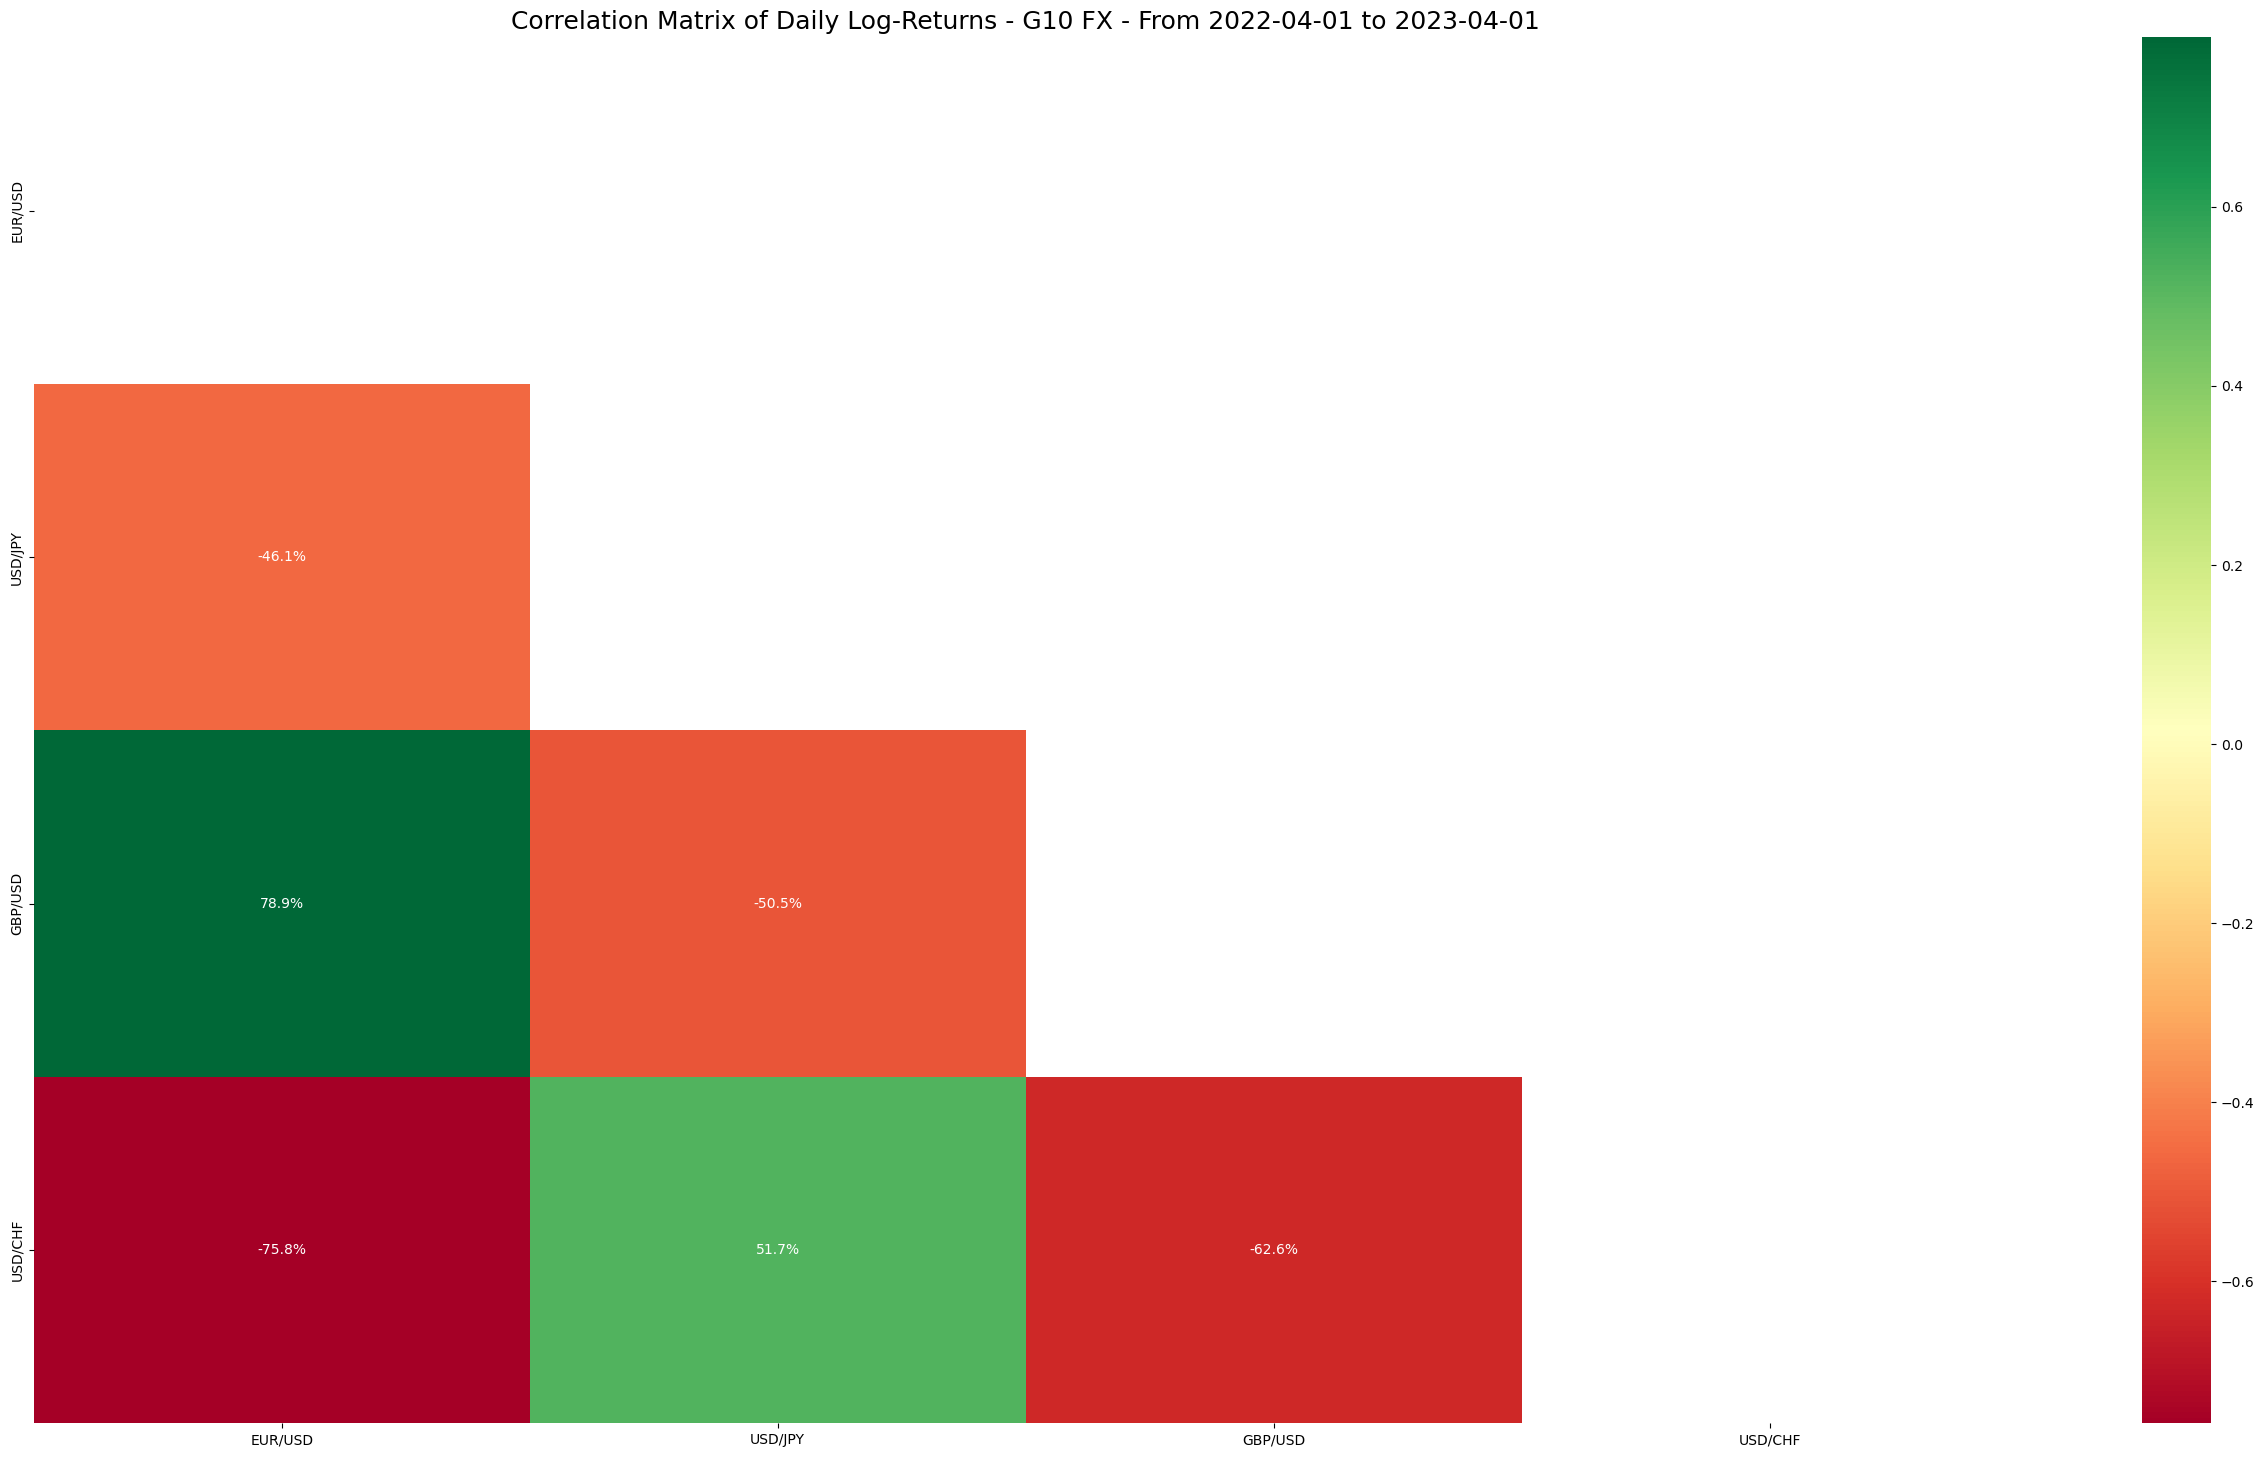

Highly correlated G10 Pairs (Higher than 75%):
   Asset 1  Asset 2  Correlation
0  EUR/USD  GBP/USD     0.789304
Highly decorrelated G10 Pairs (Lower than 75%):
   Asset 1  Asset 2  Correlation
0  EUR/USD  USD/CHF    -0.758344


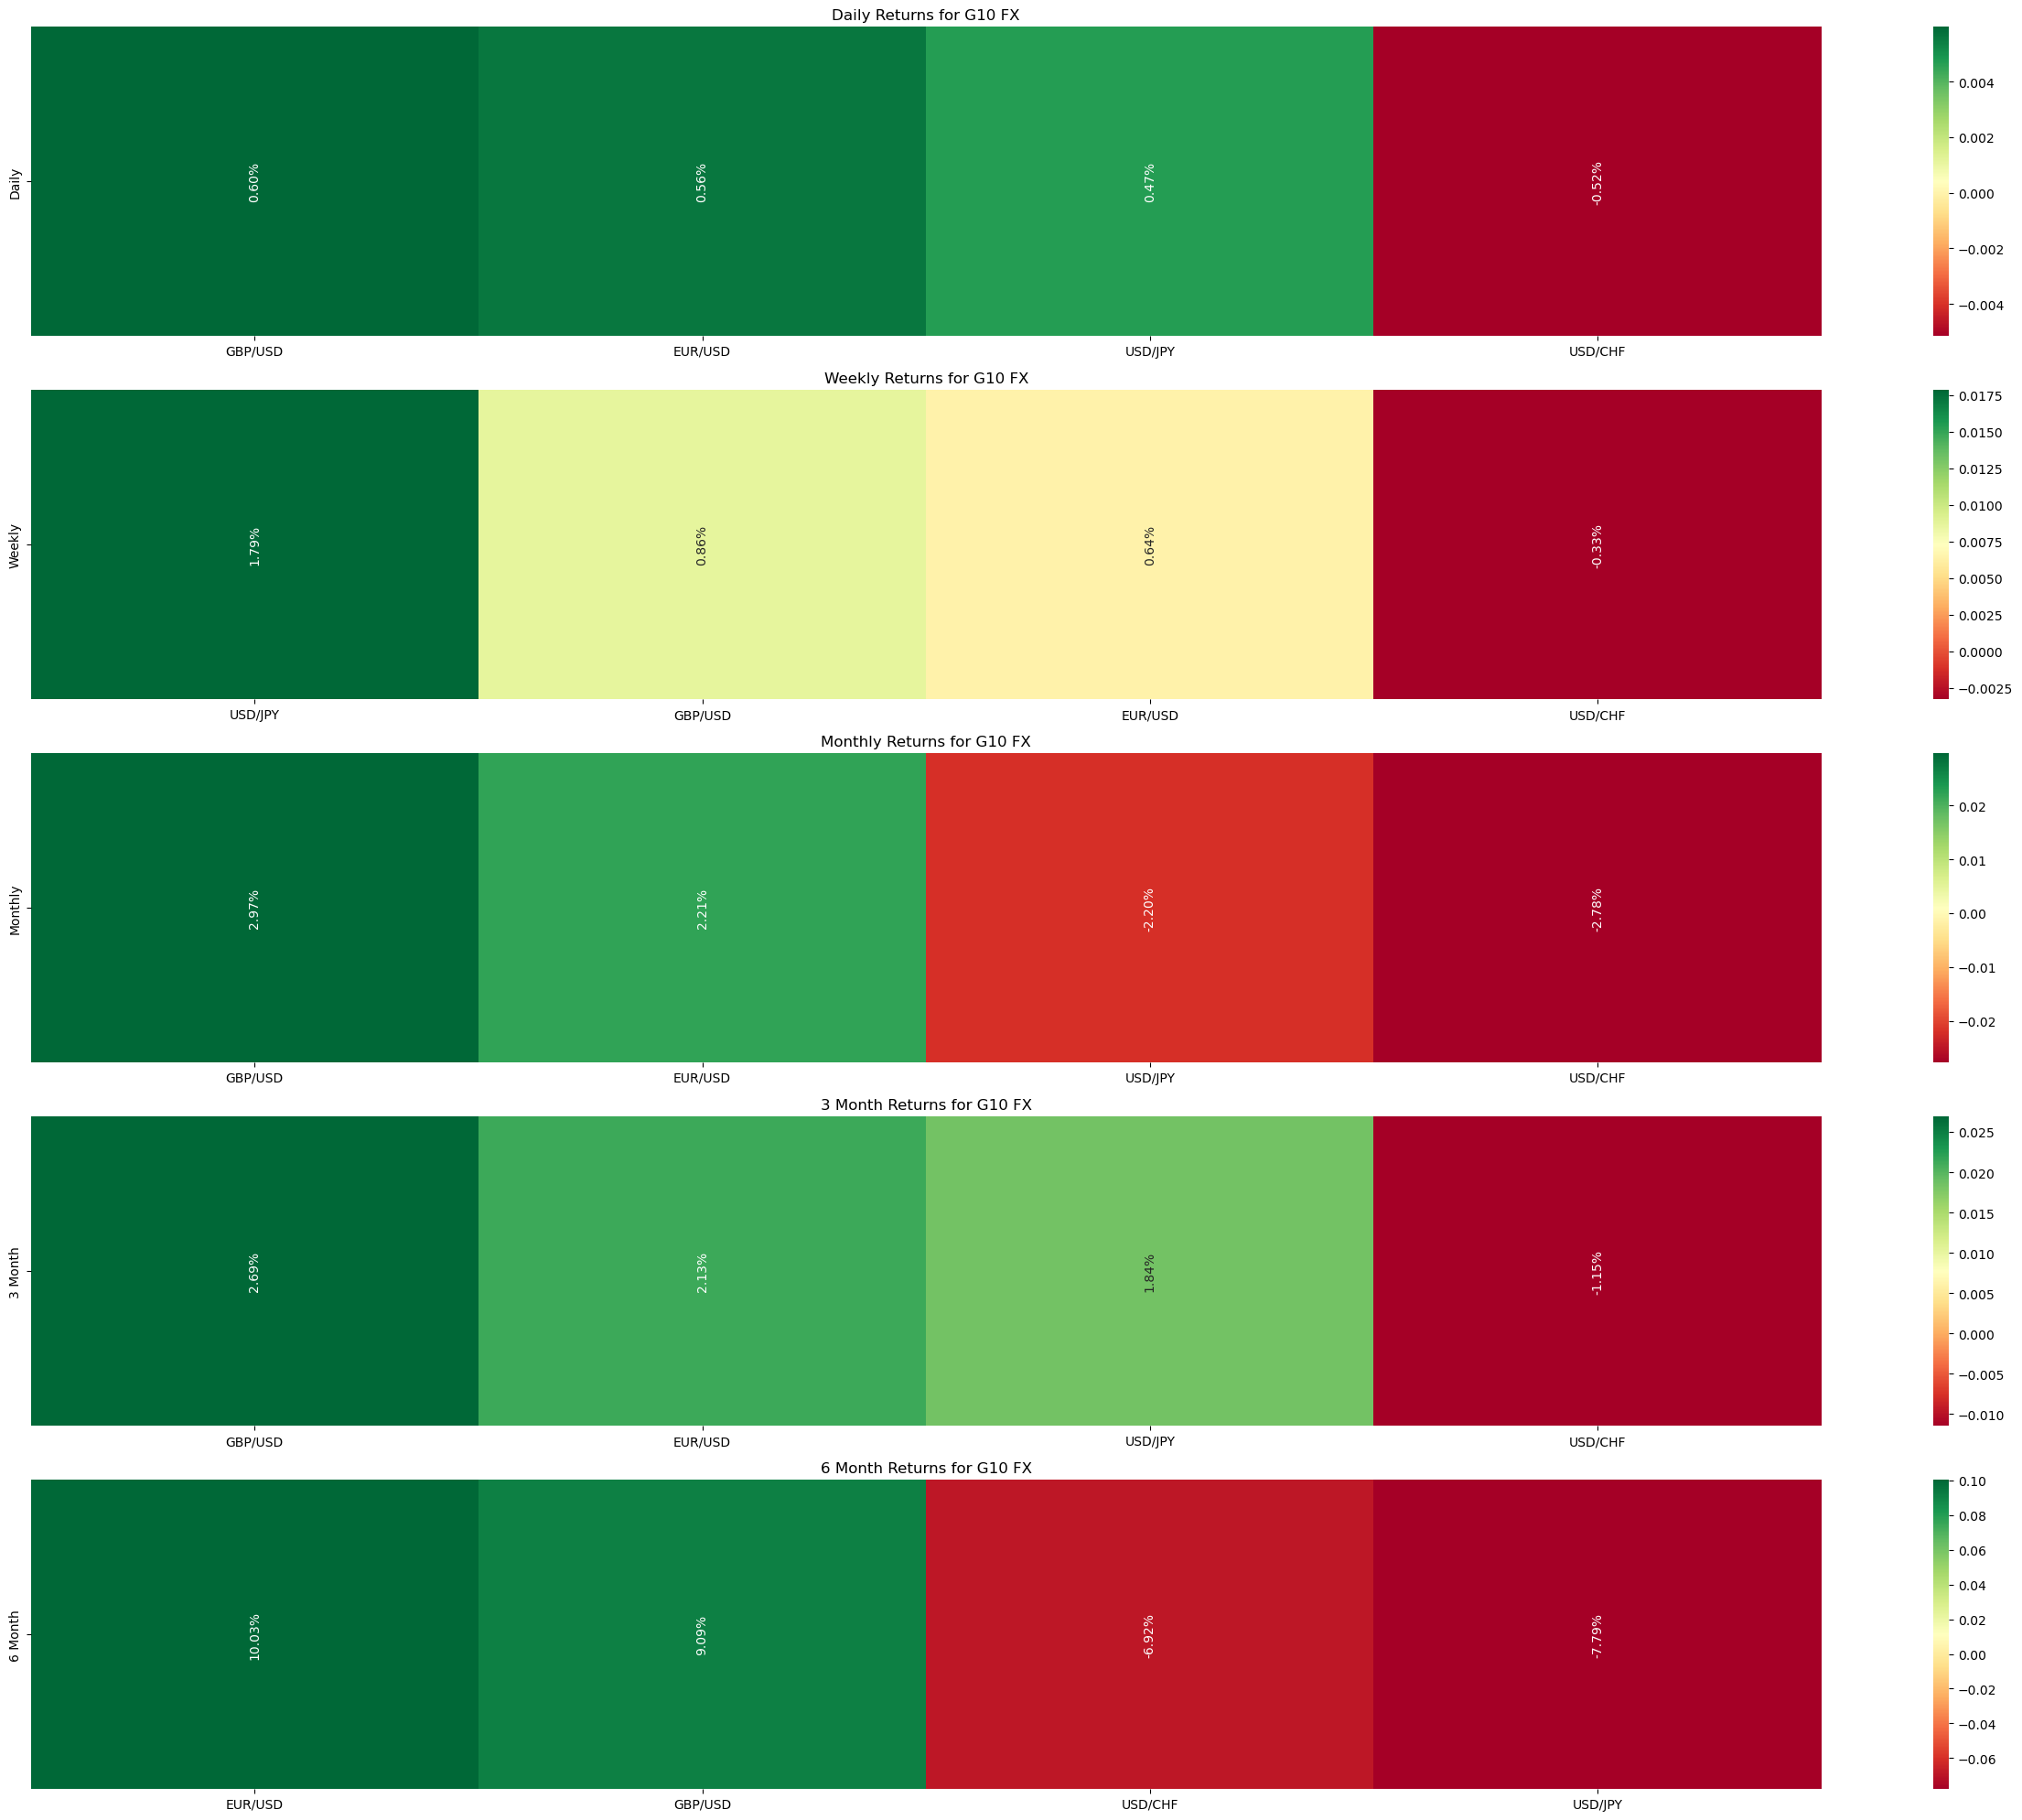

In [65]:
# --------------------------------------------- G10 FX ------------------------------------------------------------------

# A correlation coefficient is a statistic that provides a measure how the 
# two pairs are associated. 
corr_g10= asset_categories_data['G10 FX'].corr()
mask=np.triu(np.ones_like(corr_g10,dtype=bool))
fig, ax = plt.subplots(figsize=(32,18))
sns.heatmap(corr_g10, cmap="RdYlGn", annot=True, fmt='.01%', mask=mask)

# Set the title
ax.set_title(f"Correlation Matrix of Daily Log-Returns - G10 FX - From {startdate.strftime('%Y-%m-%d')} to {enddate.strftime('%Y-%m-%d')}", fontsize=18)
# Save plot as image
plt.savefig("G10 FX - Correlation.png")
# Show the plot
plt.show()

# Identify highly correlated assets
highly_correlated_g10 = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_g10)):
    for j in range(i+1, len(corr_g10)):
        if corr_g10.iloc[i,j] > 0.75:
            highly_correlated_g10 = highly_correlated_g10.append({'Asset 1': corr_g10.index[i], 'Asset 2': corr_g10.columns[j], 'Correlation': corr_g10.iloc[i,j]}, ignore_index=True)

# Identify highly decorrelated assets
highly_decorrelated_g10 = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_g10)):
    for j in range(i+1, len(corr_g10)):
        if corr_g10.iloc[i,j] < -0.75:
            highly_decorrelated_g10 = highly_decorrelated_g10.append({'Asset 1': corr_g10.index[i], 'Asset 2': corr_g10.columns[j], 'Correlation': corr_g10.iloc[i,j]}, ignore_index=True)

print('Highly correlated G10 Pairs (Higher than 75%):')
print(highly_correlated_g10)
print('Highly decorrelated G10 Pairs (Lower than 75%):')
print(highly_decorrelated_g10)

# -------------------- Returns Over Time Frames

# calculate log returns
log_returns_g10 = np.log(asset_categories_prices['G10 FX']).diff()

# Define a function to calculate the rolling returns for a given time period
def calc_rolling_returns(returns, time_period):
    return np.exp(returns.rolling(time_period, min_periods=time_period).sum()) - 1

# Calculate daily, weekly, monthly, 3 month, and 6 month rolling log returns
daily_returns_g10 = log_returns_g10.iloc[-1]
weekly_returns_g10 = calc_rolling_returns(log_returns_g10, 5).iloc[-1]
monthly_returns_g10 = calc_rolling_returns(log_returns_g10, 21).iloc[-1]
three_month_returns_g10 = calc_rolling_returns(log_returns_g10, 63).iloc[-1]
six_month_returns_g10 = calc_rolling_returns(log_returns_g10, 126).iloc[-1]
one_year_returns_g10 = calc_rolling_returns(log_returns_g10, 252).iloc[-1]

# Combine returns into a single dataframe
df_g10 = pd.concat([daily_returns_g10, weekly_returns_g10, monthly_returns_g10,
                three_month_returns_g10, six_month_returns_g10], axis=1)
df_g10.columns = ['Daily', 'Weekly', 'Monthly', '3 Month', '6 Month']

# Set up the subplots
fig, axs = plt.subplots(nrows=5, figsize=(25, 20))

# Define a function to plot the heatmap for each time frame
def plot_heatmap(df, timeframe, ax):
    sns.heatmap(df.sort_values(by=timeframe, ascending=False).T, cmap='RdYlGn', 
                annot=True, fmt='.2%', ax=ax, annot_kws={'rotation': 90})
    ax.set_title(f'{timeframe} Returns for G10 FX')

# Loop over the subplots and plot the heatmaps
for i, timeframe in enumerate(df_g10.columns):
    plot_heatmap(df_g10[[timeframe]], timeframe, axs[i])

plt.tight_layout()
plt.savefig("G10 FX Log-Returns Over Time-Frames.png")
plt.show()



### EM FX

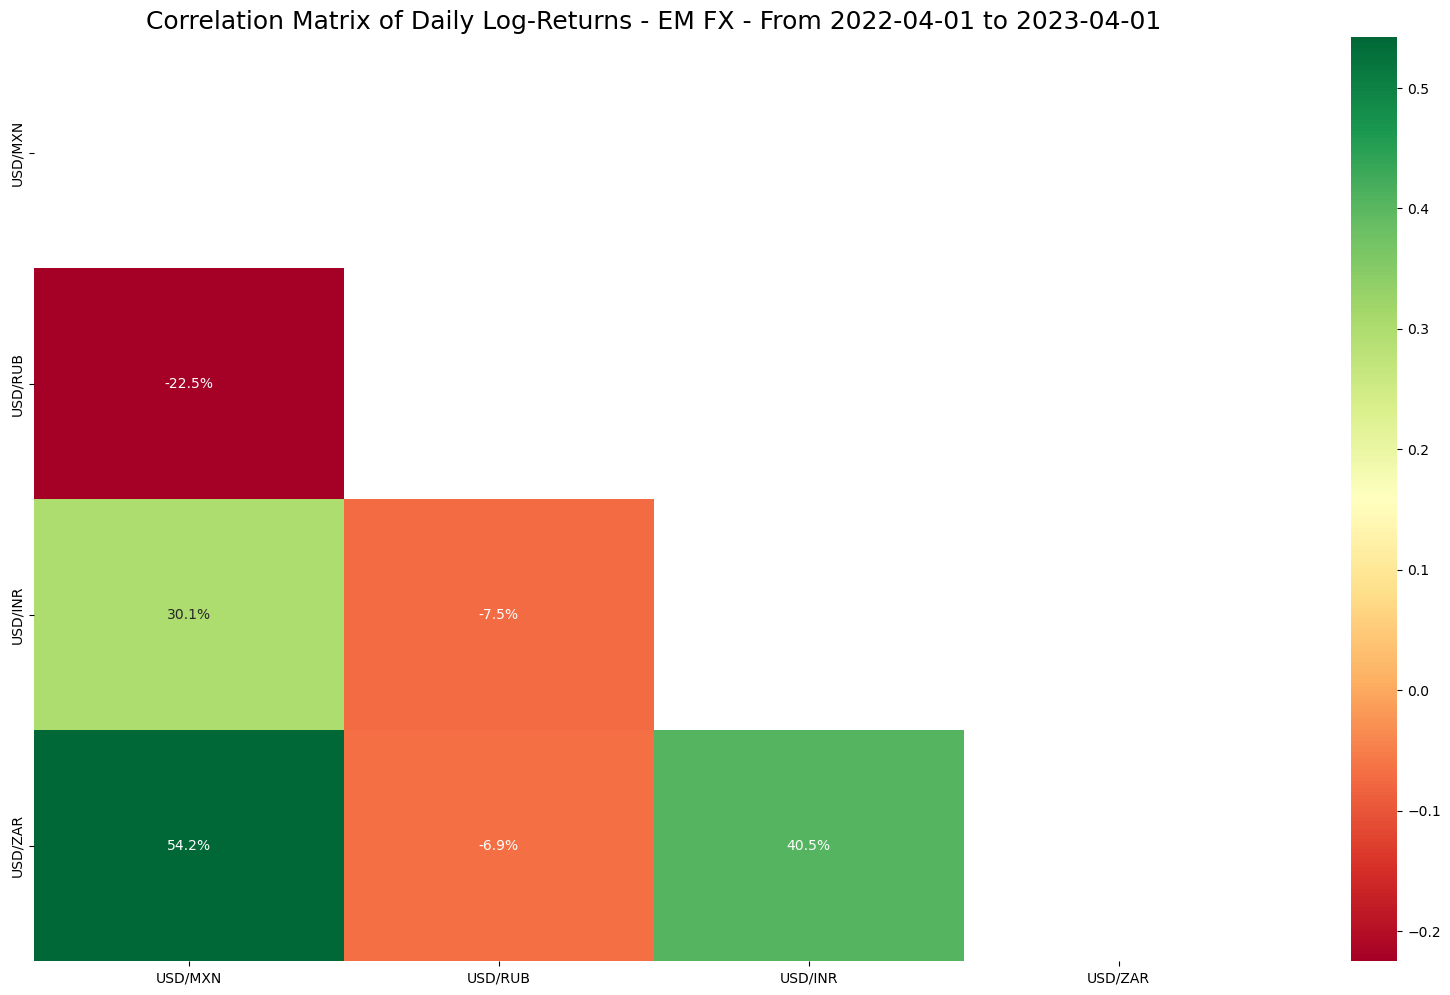

Highly correlated EM FX Pairs (Higher than 75%):
Empty DataFrame
Columns: [Asset 1, Asset 2, Correlation]
Index: []
Highly decorrelated EM FX Pairs (Lower than 75%):
Empty DataFrame
Columns: [Asset 1, Asset 2, Correlation]
Index: []


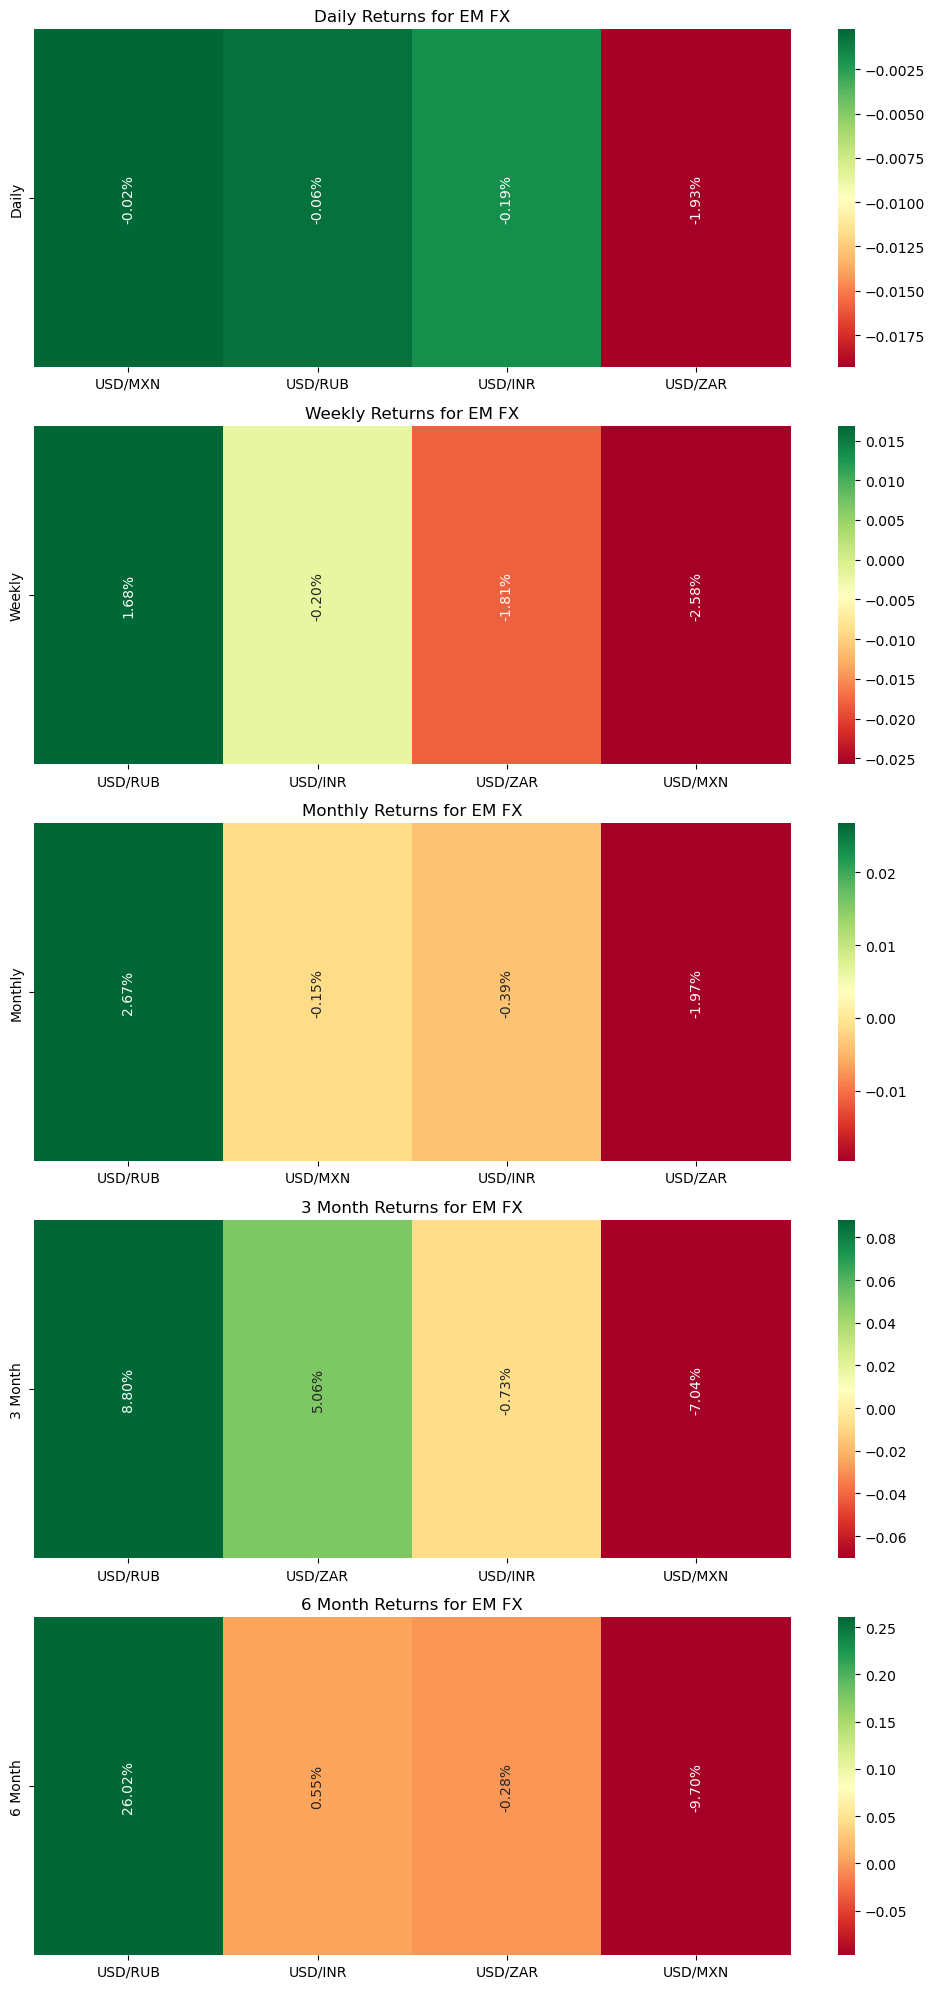

In [66]:
# --------------------------------------------- EM FX ------------------------------------------------------------------

# A correlation coefficient is a statistic that provides a measure how the 
# two pairs are associated. 
corr_em= asset_categories_data['EM FX'].corr()

mask=np.triu(np.ones_like(corr_em,dtype=bool))
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_em, cmap="RdYlGn", annot=True, fmt='.01%', mask=mask)

# Set the title
ax.set_title(f"Correlation Matrix of Daily Log-Returns - EM FX - From {startdate.strftime('%Y-%m-%d')} to {enddate.strftime('%Y-%m-%d')}", fontsize=18)
# Save plot as image
plt.savefig("EM FX - Correlation.png")
# Show the plot
plt.show()

# Identify highly correlated assets
highly_correlated_em = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_em)):
    for j in range(i+1, len(corr_em)):
        if corr_em.iloc[i,j] > 0.75:
            highly_correlated_em = highly_correlated_em.append({'Asset 1': corr_em.index[i], 'Asset 2': corr_em.columns[j], 'Correlation': corr_em.iloc[i,j]}, ignore_index=True)

# Identify highly decorrelated assets
highly_decorrelated_em = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_em)):
    for j in range(i+1, len(corr_em)):
        if corr_em.iloc[i,j] < -0.75:
            highly_decorrelated_em = highly_decorrelated_em.append({'Asset 1': corr_em.index[i], 'Asset 2': corr_em.columns[j], 'Correlation': corr_em.iloc[i,j]}, ignore_index=True)

print('Highly correlated EM FX Pairs (Higher than 75%):')
print(highly_correlated_em)
print('Highly decorrelated EM FX Pairs (Lower than 75%):')
print(highly_decorrelated_em)

# --------------------

# calculate log returns
log_returns_em = np.log(asset_categories_prices['EM FX']).diff()

# Define a function to calculate the rolling returns for a given time period
def calc_rolling_returns(returns, time_period):
    return np.exp(returns.rolling(time_period, min_periods=time_period).sum()) - 1

# Calculate daily, weekly, monthly, 3 month, and 6 month rolling log returns
daily_returns_em = log_returns_em.iloc[-1]
weekly_returns_em = calc_rolling_returns(log_returns_em, 5).iloc[-1]
monthly_returns_em = calc_rolling_returns(log_returns_em, 21).iloc[-1]
three_month_returns_em = calc_rolling_returns(log_returns_em, 63).iloc[-1]
six_month_returns_em = calc_rolling_returns(log_returns_em, 126).iloc[-1]
one_year_returns_em = calc_rolling_returns(log_returns_em, 252).iloc[-1]

# Combine returns into a single dataframe
df_em = pd.concat([daily_returns_em, weekly_returns_em, monthly_returns_em,
                   three_month_returns_em, six_month_returns_em], axis=1)
df_em.columns = ['Daily', 'Weekly', 'Monthly', '3 Month', '6 Month']

# Set up the subplots
fig, axs = plt.subplots(nrows=5, figsize=(10, 20))

# Define a function to plot the heatmap for each time frame
def plot_heatmap(df, timeframe, ax):
    sns.heatmap(df.sort_values(by=timeframe, ascending=False).T, cmap='RdYlGn', 
                annot=True, fmt='.2%', ax=ax, annot_kws={'rotation': 90})
    ax.set_title(f'{timeframe} Returns for EM FX')

# Loop over the subplots and plot the heatmaps
for i, timeframe in enumerate(df_em.columns):
    plot_heatmap(df_em[[timeframe]], timeframe, axs[i])

plt.tight_layout()
plt.savefig("EM FX Log-Returns Over Time-Frames.png")
plt.show()

### Precious Metals

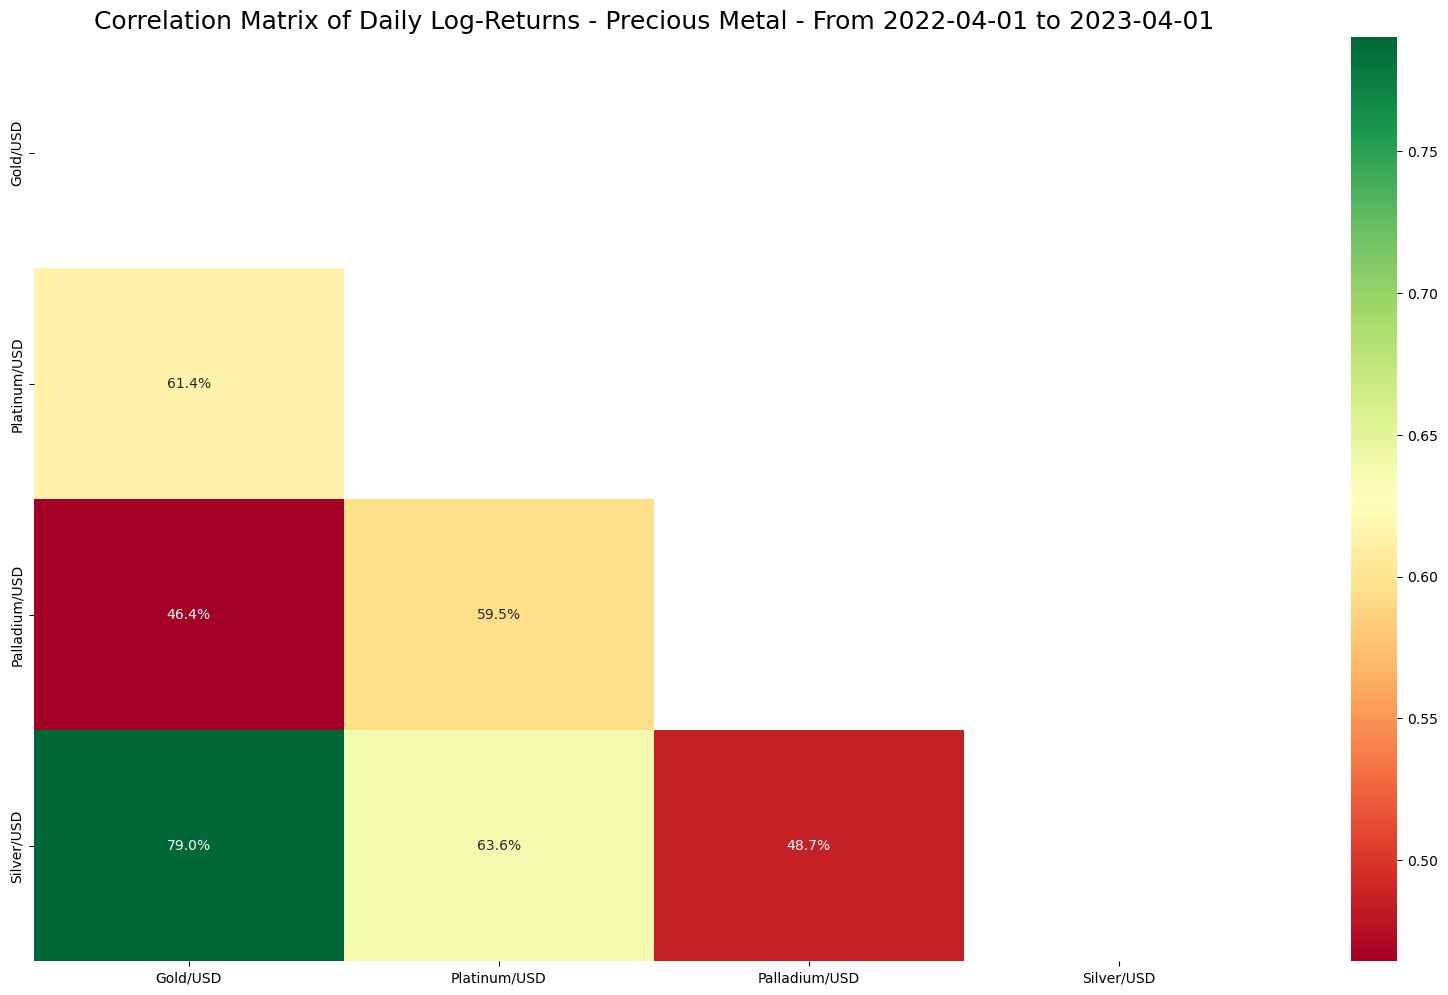

Highly correlated PM Pairs (Higher than 75%):
    Asset 1     Asset 2  Correlation
0  Gold/USD  Silver/USD     0.790287
Highly decorrelated PM Pairs (Lower than 75%):
Empty DataFrame
Columns: [Asset 1, Asset 2, Correlation]
Index: []


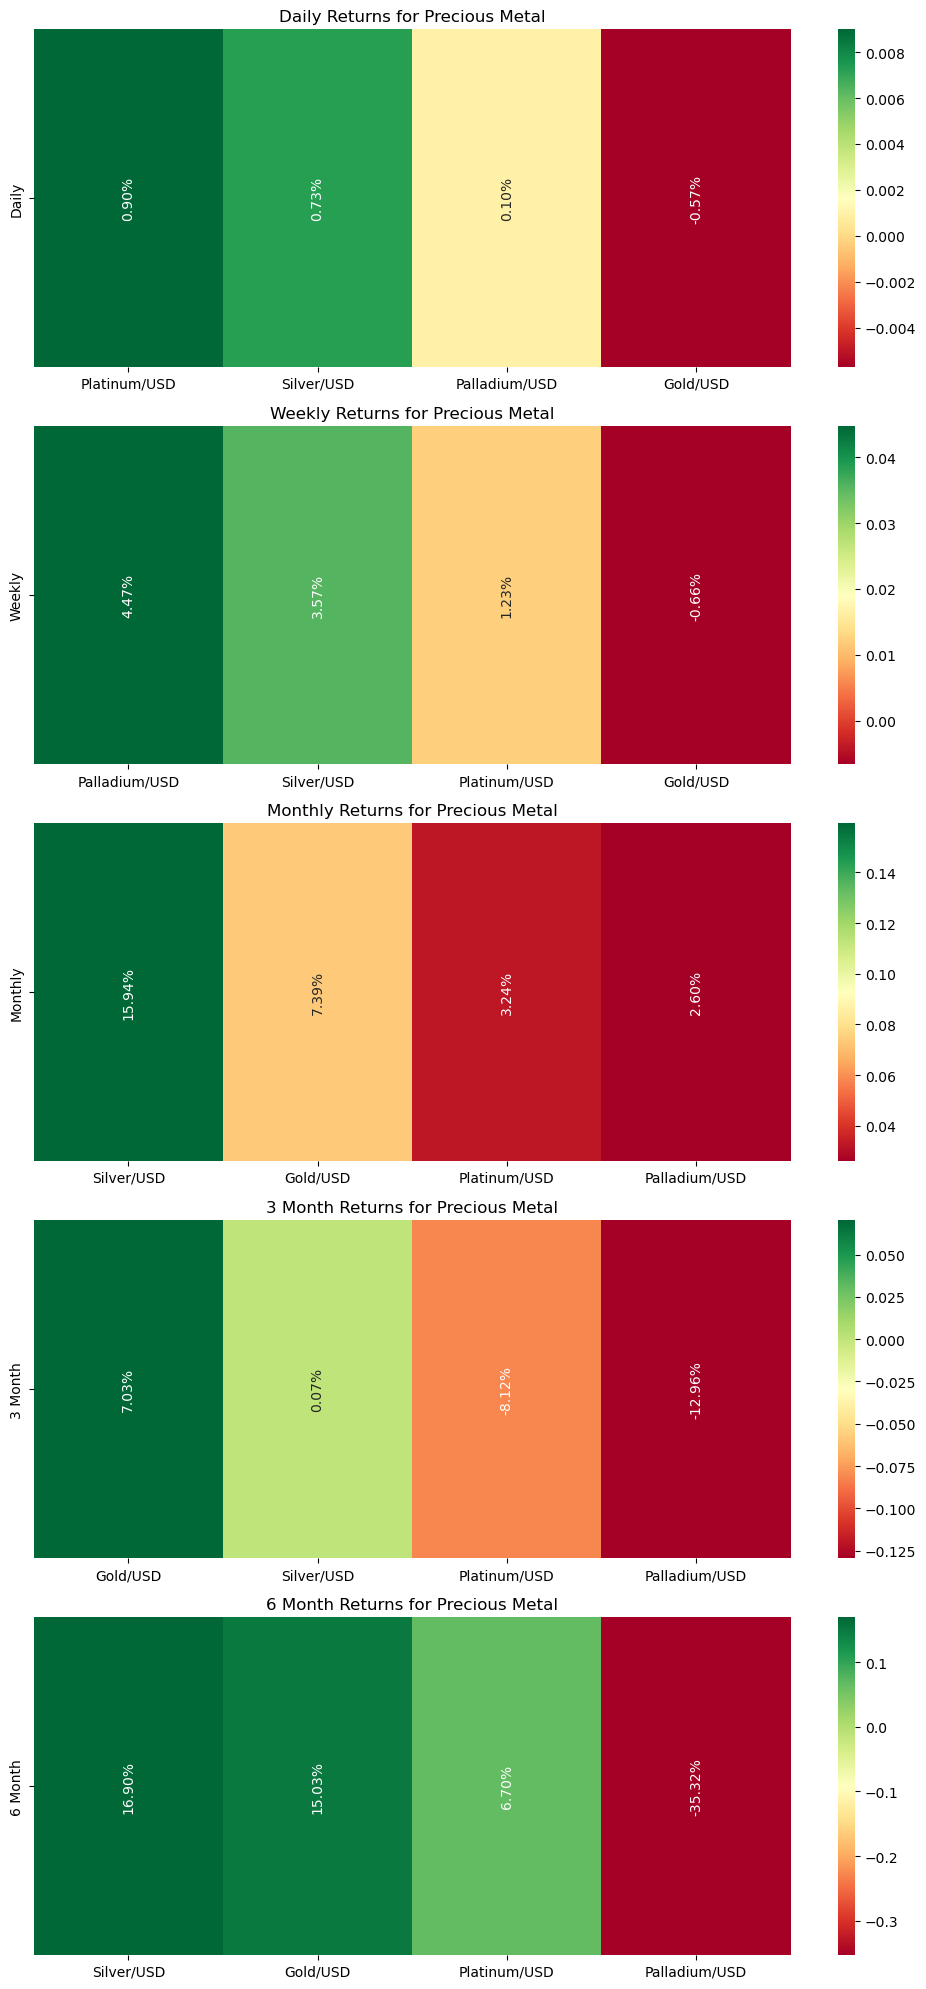

In [67]:
# ---------------------------------------- Precious Metals ----------------------------------------------------------------

# A correlation coefficient is a statistic that provides a measure how the 
# two pairs are associated. 
corr_pm= asset_categories_data['Precious Metal'].corr()

mask=np.triu(np.ones_like(corr_pm,dtype=bool))
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_pm, cmap="RdYlGn", annot=True, fmt='.01%', mask=mask)

# Set the title
ax.set_title(f"Correlation Matrix of Daily Log-Returns - Precious Metal - From {startdate.strftime('%Y-%m-%d')} to {enddate.strftime('%Y-%m-%d')}", fontsize=18)
# Save plot as image
plt.savefig("Precious Metal - Correlation.png")
# Show the plot
plt.show()

# Identify highly correlated assets
highly_correlated_pm = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_pm)):
    for j in range(i+1, len(corr_pm)):
        if corr_pm.iloc[i,j] > 0.75:
            highly_correlated_pm = highly_correlated_pm.append({'Asset 1': corr_pm.index[i], 'Asset 2': corr_pm.columns[j], 'Correlation': corr_pm.iloc[i,j]}, ignore_index=True)

# Identify highly decorrelated assets
highly_decorrelated_pm = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_pm)):
    for j in range(i+1, len(corr_pm)):
        if corr_pm.iloc[i,j] < -0.75:
            highly_decorrelated_pm = highly_decorrelated_pm.append({'Asset 1': corr_pm.index[i], 'Asset 2': corr_pm.columns[j], 'Correlation': corr_pm.iloc[i,j]}, ignore_index=True)

print('Highly correlated PM Pairs (Higher than 75%):')
print(highly_correlated_pm)
print('Highly decorrelated PM Pairs (Lower than 75%):')
print(highly_decorrelated_pm)

# --------------------

# calculate log returns
log_returns_pm = np.log(asset_categories_prices['Precious Metal']).diff()

# Define a function to calculate the rolling returns for a given time period
def calc_rolling_returns(returns, time_period):
    return np.exp(returns.rolling(time_period, min_periods=time_period).sum()) - 1

# Calculate daily, weekly, monthly, 3 month, and 6 month rolling log returns
daily_returns_pm = log_returns_pm.iloc[-1]
weekly_returns_pm = calc_rolling_returns(log_returns_pm, 5).iloc[-1]
monthly_returns_pm = calc_rolling_returns(log_returns_pm, 21).iloc[-1]
three_month_returns_pm = calc_rolling_returns(log_returns_pm, 63).iloc[-1]
six_month_returns_pm = calc_rolling_returns(log_returns_pm, 126).iloc[-1]
one_year_returns_pm = calc_rolling_returns(log_returns_pm, 252).iloc[-1]

# Combine returns into a single dataframe
df_pm = pd.concat([daily_returns_pm, weekly_returns_pm, monthly_returns_pm,
                   three_month_returns_pm, six_month_returns_pm], axis=1)
df_pm.columns = ['Daily', 'Weekly', 'Monthly', '3 Month', '6 Month']

# Set up the subplots
fig, axs = plt.subplots(nrows=5, figsize=(10, 20))

# Define a function to plot the heatmap for each time frame
def plot_heatmap(df, timeframe, ax):
    sns.heatmap(df.sort_values(by=timeframe, ascending=False).T, cmap='RdYlGn', 
                annot=True, fmt='.2%', ax=ax, annot_kws={'rotation': 90})
    ax.set_title(f'{timeframe} Returns for Precious Metal')

# Loop over the subplots and plot the heatmaps
for i, timeframe in enumerate(df_pm.columns):
    plot_heatmap(df_pm[[timeframe]], timeframe, axs[i])

plt.tight_layout()
plt.savefig("Precious Metal Log-Returns Over Time-Frames.png")
plt.show()

### Other Commodities

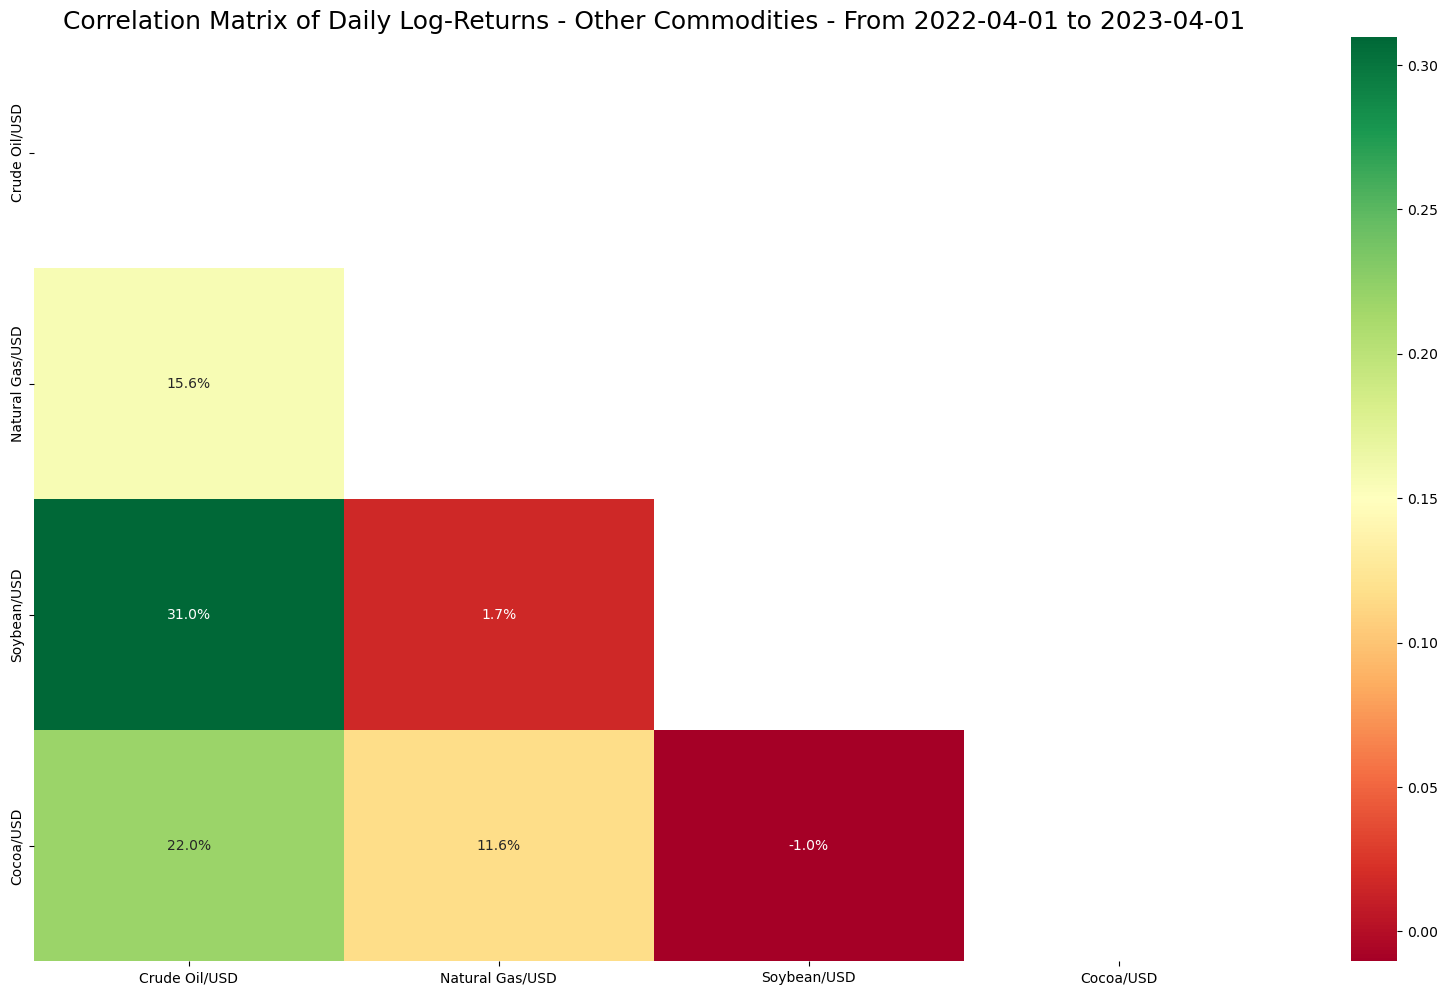

Highly correlated Other Commo Pairs (Higher than 75%):
Empty DataFrame
Columns: [Asset 1, Asset 2, Correlation]
Index: []
Highly decorrelated Other Commo Pairs (Lower than 75%):
Empty DataFrame
Columns: [Asset 1, Asset 2, Correlation]
Index: []


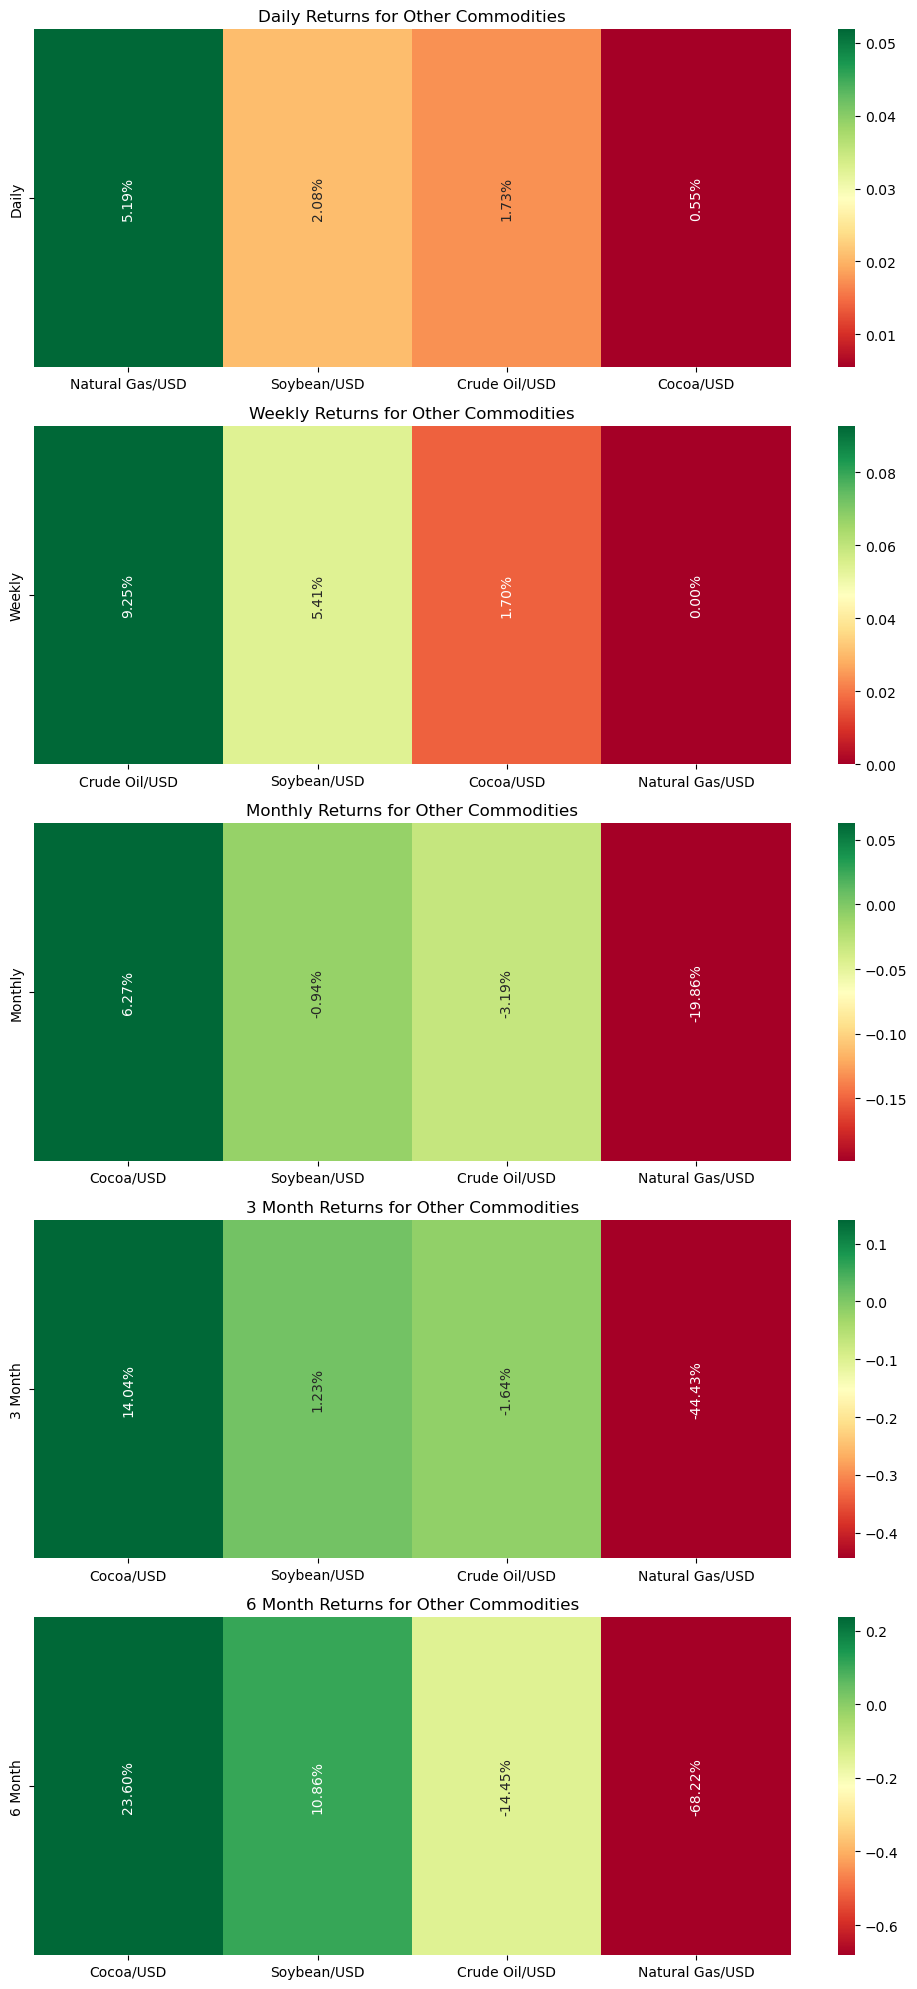

In [68]:
# ---------------------------------------- Other Commodities -------------------------------------------------------------

# A correlation coefficient is a statistic that provides a measure how the 
# two pairs are associated. 
corr_comm= asset_categories_data['Other Commodities'].corr()

mask=np.triu(np.ones_like(corr_comm,dtype=bool))
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_comm, cmap="RdYlGn", annot=True, fmt='.01%', mask=mask)

# Set the title
ax.set_title(f"Correlation Matrix of Daily Log-Returns - Other Commodities - From {startdate.strftime('%Y-%m-%d')} to {enddate.strftime('%Y-%m-%d')}", fontsize=18)
# Save plot as image
plt.savefig("Other Commodities - Correlation.png")
# Show the plot
plt.show()

# Identify highly correlated assets
highly_correlated_comm = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_comm)):
    for j in range(i+1, len(corr_comm)):
        if corr_comm.iloc[i,j] > 0.75:
            highly_correlated_comm = highly_correlated_comm.append({'Asset 1': corr_comm.index[i], 'Asset 2': corr_comm.columns[j], 'Correlation': corr_comm.iloc[i,j]}, ignore_index=True)

# Identify highly decorrelated assets
highly_decorrelated_comm = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation'])
for i in range(len(corr_comm)):
    for j in range(i+1, len(corr_comm)):
        if corr_comm.iloc[i,j] < -0.75:
            highly_decorrelated_comm = highly_decorrelated_comm.append({'Asset 1': corr_comm.index[i], 'Asset 2': corr_comm.columns[j], 'Correlation': corr_comm.iloc[i,j]}, ignore_index=True)

print('Highly correlated Other Commo Pairs (Higher than 75%):')
print(highly_correlated_comm)
print('Highly decorrelated Other Commo Pairs (Lower than 75%):')
print(highly_decorrelated_comm)

# --------------------

# calculate log returns
log_returns_comm = np.log(asset_categories_prices['Other Commodities']).diff()

# Define a function to calculate the rolling returns for a given time period
def calc_rolling_returns(returns, time_period):
    return np.exp(returns.rolling(time_period, min_periods=time_period).sum()) - 1

# Calculate daily, weekly, monthly, 3 month, and 6 month rolling log returns
daily_returns_comm = log_returns_comm.iloc[-1]
weekly_returns_comm = calc_rolling_returns(log_returns_comm, 5).iloc[-1]
monthly_returns_comm = calc_rolling_returns(log_returns_comm, 21).iloc[-1]
three_month_returns_comm = calc_rolling_returns(log_returns_comm, 63).iloc[-1]
six_month_returns_comm = calc_rolling_returns(log_returns_comm, 126).iloc[-1]
one_year_returns_comm = calc_rolling_returns(log_returns_comm, 252).iloc[-1]

# Combine returns into a single dataframe
df_comm = pd.concat([daily_returns_comm, weekly_returns_comm, monthly_returns_comm, 
                     three_month_returns_comm, six_month_returns_comm], axis=1)
df_comm.columns = ['Daily', 'Weekly', 'Monthly', '3 Month', '6 Month']

# Set up the subplots
fig, axs = plt.subplots(nrows=5, figsize=(10, 20))

# Define a function to plot the heatmap for each time frame
def plot_heatmap(df, timeframe, ax):
    sns.heatmap(df.sort_values(by=timeframe, ascending=False).T, cmap='RdYlGn', 
                annot=True, fmt='.2%', ax=ax, annot_kws={'rotation': 90})
    ax.set_title(f'{timeframe} Returns for Other Commodities')

# Loop over the subplots and plot the heatmaps
for i, timeframe in enumerate(df_comm.columns):
    plot_heatmap(df_comm[[timeframe]], timeframe, axs[i])

plt.tight_layout()
plt.savefig("Other Commodities Log-Returns Over Time-Frames.png")
plt.show()

This code defines a function **plot_normalized_data** that takes in a Pandas DataFrame. The function first normalizes the data by dividing all data points and it plots the normalized data.

The function adds some features to the plot. Specifically, a horizontal line at y=100 in black color with dotted line style is added using `axhline`. A vertical line at 01/01/2023 in red color with dashed line style is added using `axvline`. Additionally, a colored background from 01/01/2023 to the last date is added using `axvspan`.

The function then adds axis labels and modifies the title of the plot based on the column names of the input data. Finally, it saves the plot as a PNG image file with a filename that reflects the column names of the input data. The saved plot is then displayed using `plt.show()`.

The rest of the code calls the function multiple times with different subsets as input. These subsets correspond to different categories of commodities, namely G10 COMMO and EM COMMO. For example, the first call to `plot_normalized_data` plots the normalized price data of four currency pairs - EUR/USD, EUR/CAD, EUR/AUD, and NZD/USD - under the G10 COMMO category.

Overall, this code creates line charts that visualize the normalized price data of different commodity categories. The code is well-structured and uses meaningful variable names and comments to make it easy to understand and maintain.

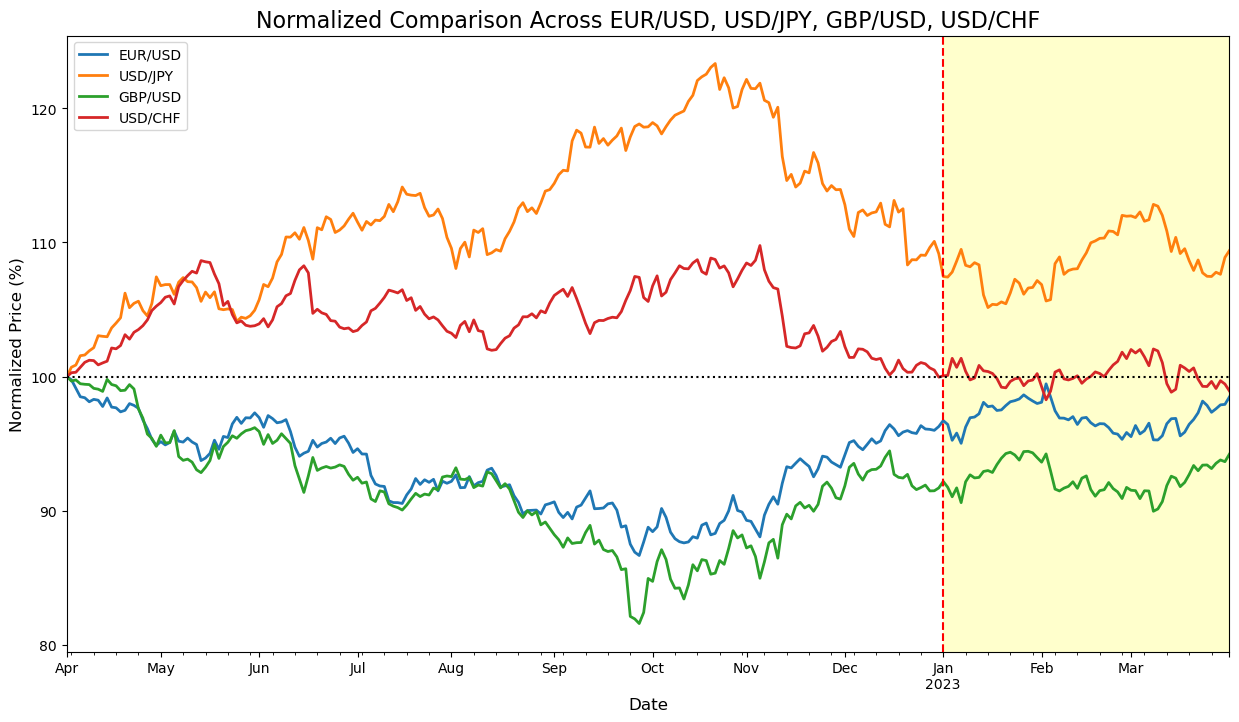

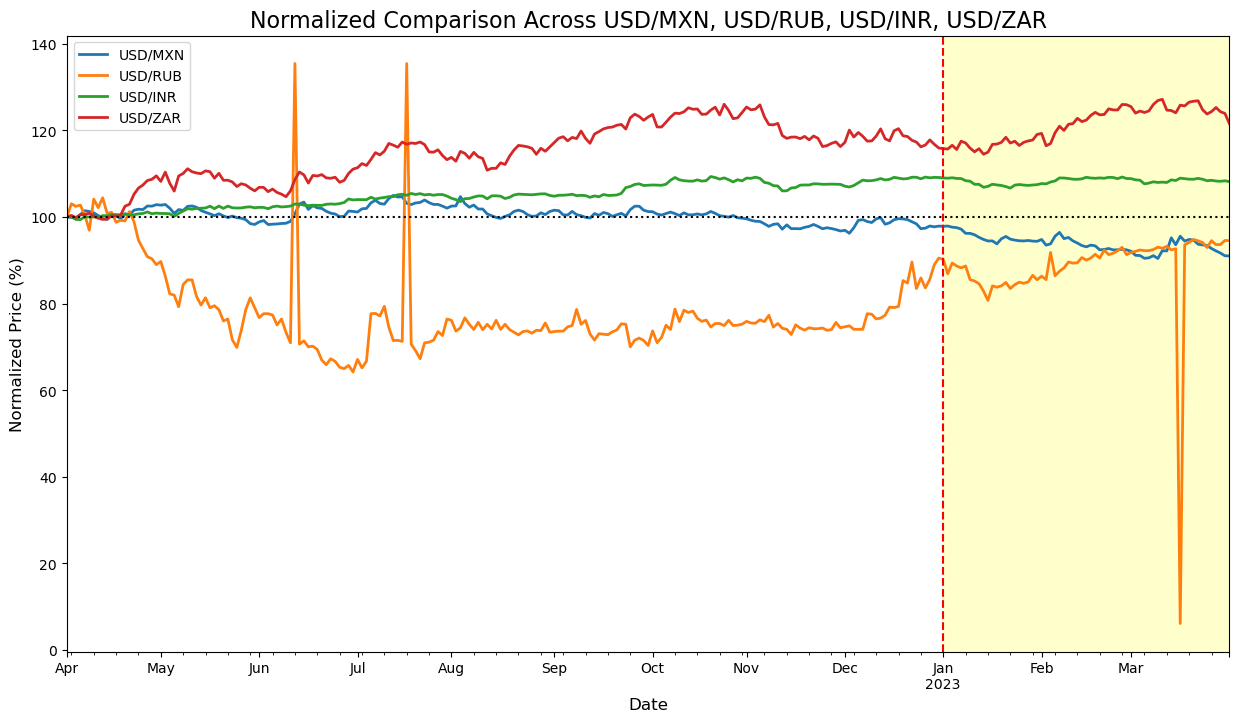

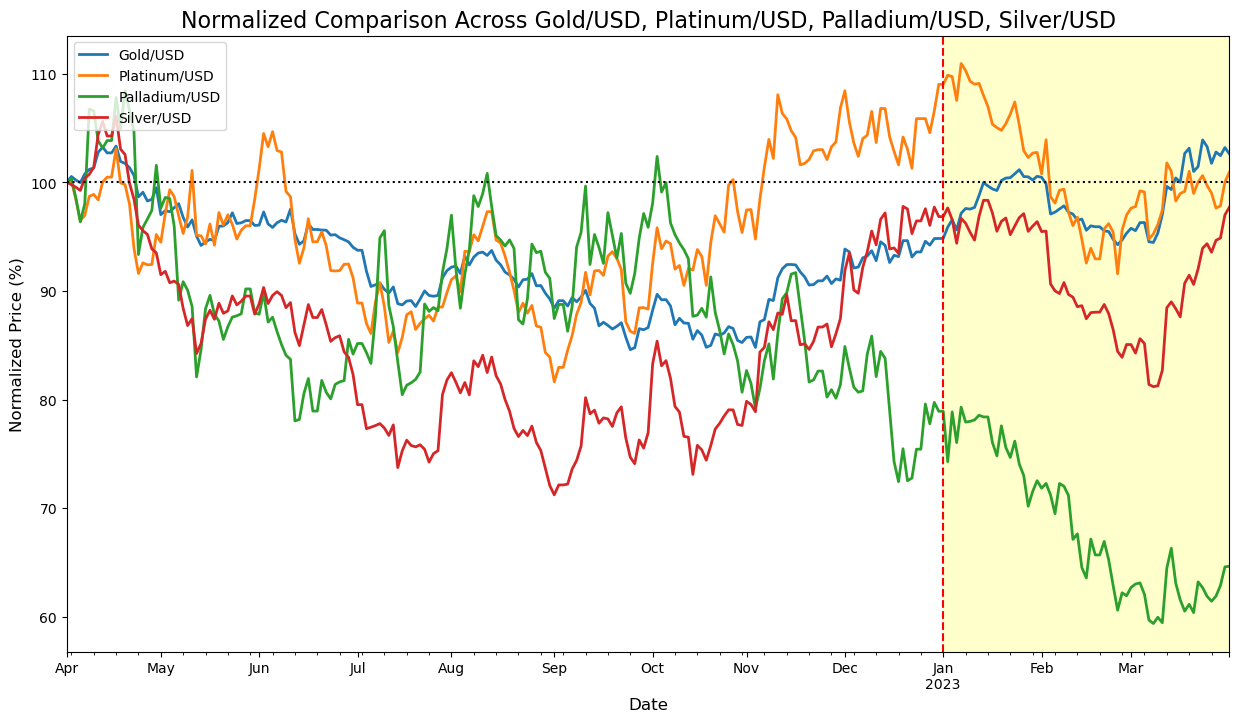

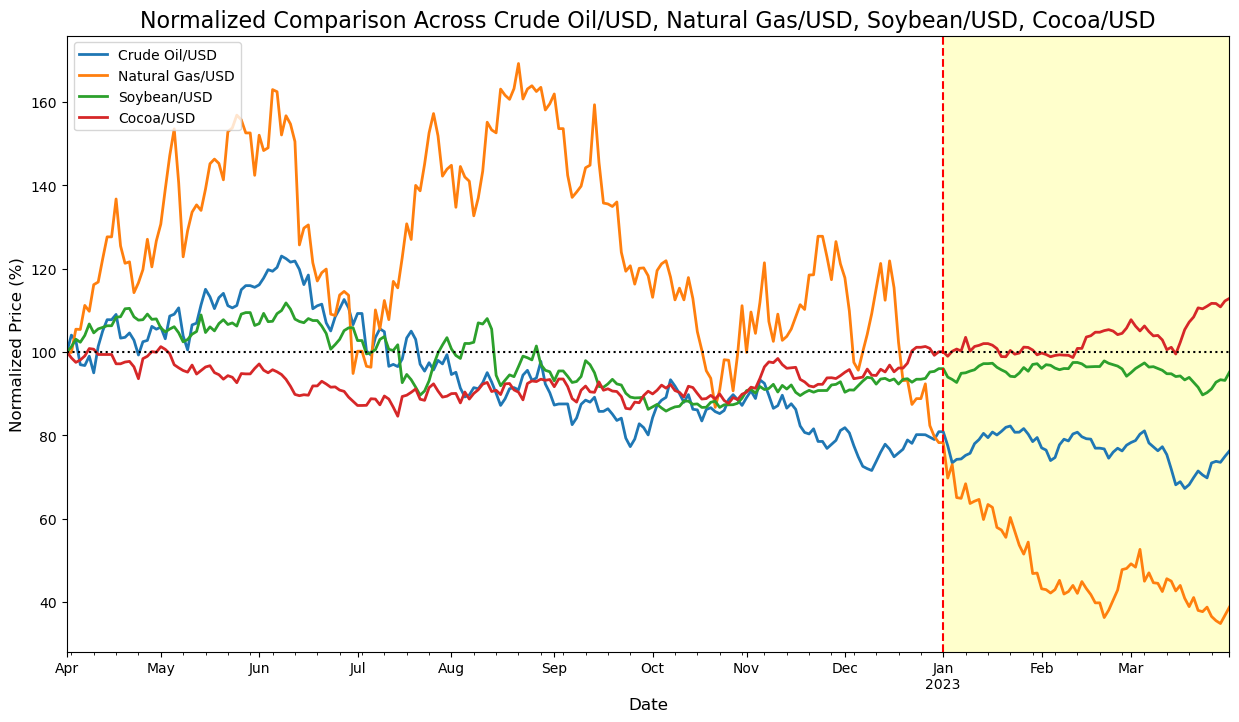

In [69]:
# -------------------- Line Charts

def plot_normalized_data(data):
    data_norm = (data / data.iloc[0] * 100) # Normalize to the first data point
    ax = data_norm.plot(figsize=(15,8), linewidth=2) # Plot with a line chart and assign the axis to a variable
    ax.axhline(y=100, color='black', linestyle=':') # Add a horizontal black line at y=100
    ax.axvline(x='2023-01-01', color='red', linestyle='--') # Add a vertical line at 01/01/2023
    ax.axvspan('2023-01-01', data_norm.index[-1], facecolor='yellow', alpha=0.2) # Add a colored background from 01/01/2023 to the last date
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Normalized Price (%)', fontsize=12)
    title = 'Normalized Comparison Across ' + ', '.join(data.columns)
    filename = "Compare " + ", ".join(data.columns).replace("/", "_") + ".png" # Replace "/" with "_"
    plt.title(title, fontsize=16) # Modify the title
    plt.legend(loc='upper left')
    plt.savefig(filename)
    plt.show()

# G10 FX
plot_normalized_data(prices_data[['EUR/USD','USD/JPY','GBP/USD','USD/CHF']])
# EM FX
plot_normalized_data(prices_data[['USD/MXN','USD/RUB','USD/INR','USD/ZAR']])
# Precious Metal
plot_normalized_data(prices_data[['Gold/USD','Platinum/USD', 'Palladium/USD','Silver/USD',]])
# Other Commodities
plot_normalized_data(prices_data[['Crude Oil/USD','Natural Gas/USD', 'Soybean/USD', 'Cocoa/USD']])


### Part 3: PCA
The purpose of PCA is to reduce the dimensionality of the data while retaining as much of the original information as possible. Here we use the PCA module from the scikit-learn library. 

Once defined the number of principal components to use and created a list of colors to use for each category, the code creates an empty dictionary to store the loadings for each category. It then loops through each asset category and performs PCA on the returns data for that category. The principal components are then plotted in a scatter plot with the x-axis representing the first principal component and the y-axis representing the second principal component. The scatter plot is saved as a PNG file and displayed.

The code then prints the explained variance ratio for each principal component, which indicates how much of the original variance in the data is explained by each principal component. Finally, the loadings for each principal component are stored in a dataset and printed to the console.

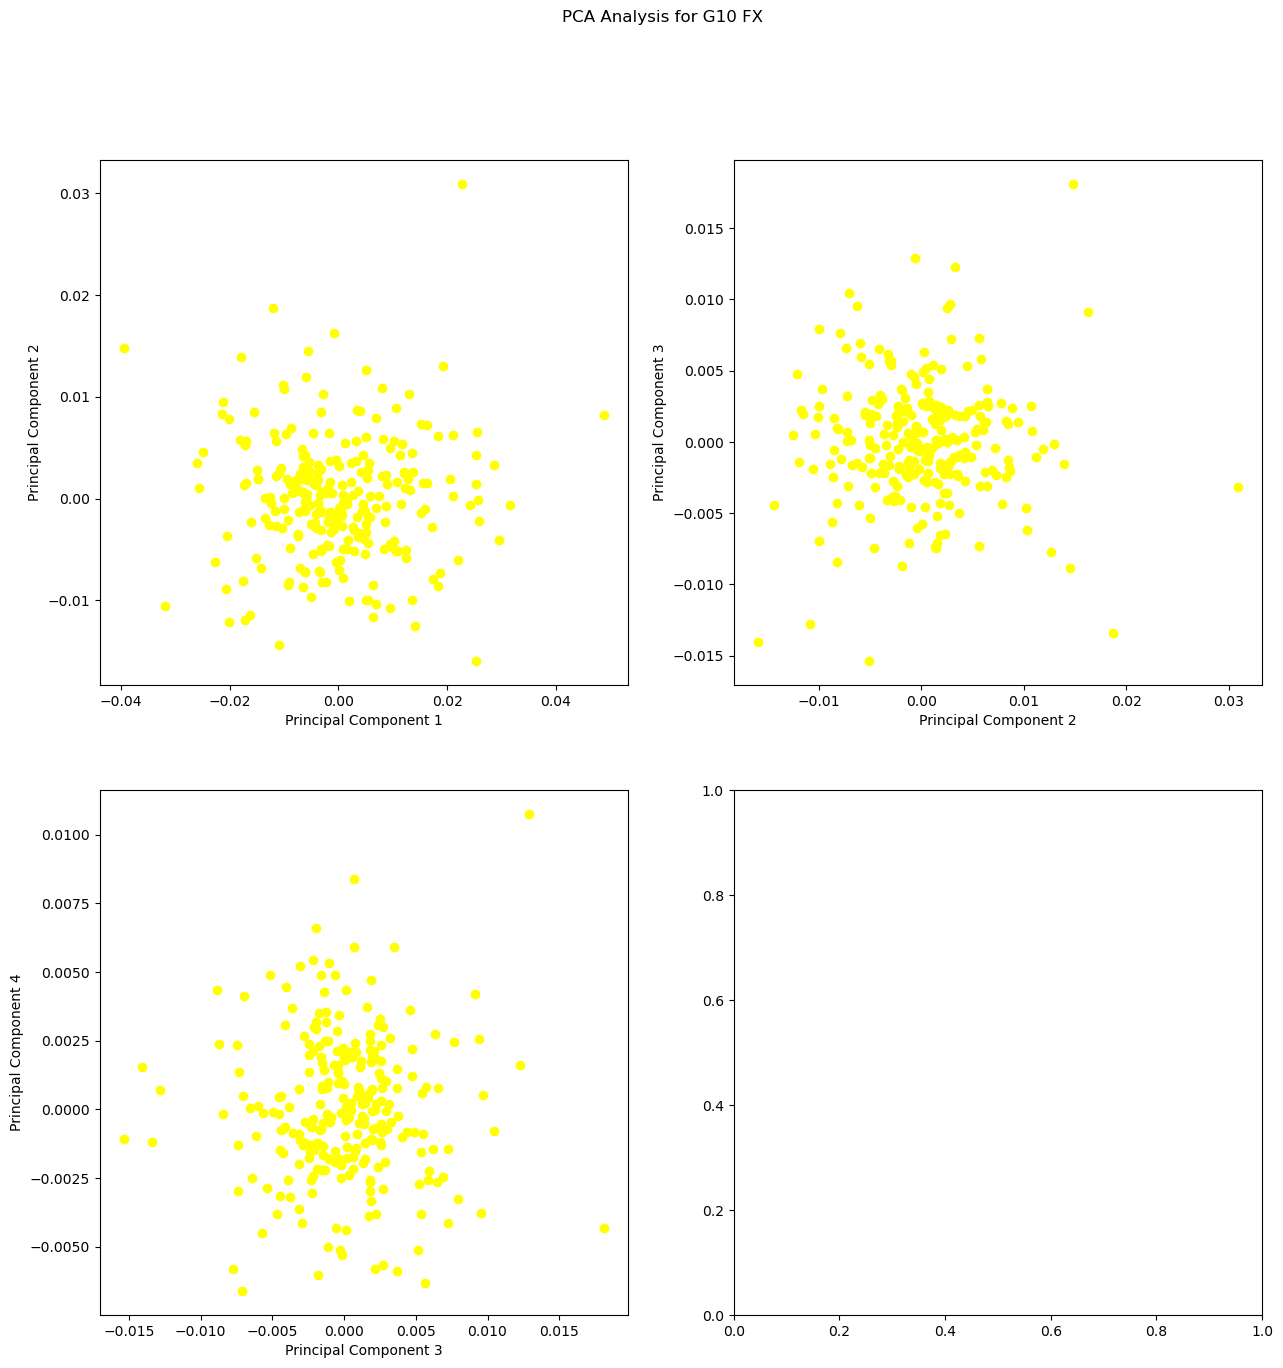

Explained variance ratio for G10 FX: [0.70199727 0.17637265 0.08735033 0.03427974]
Loadings for G10 FX:
              PC1       PC2       PC3       PC4
EUR/USD  0.455475 -0.325249  0.213963 -0.800610
USD/JPY -0.498677 -0.857371  0.091207  0.088982
GBP/USD  0.603755 -0.381861 -0.614724  0.334329
USD/CHF -0.423490  0.115369 -0.753668 -0.489214


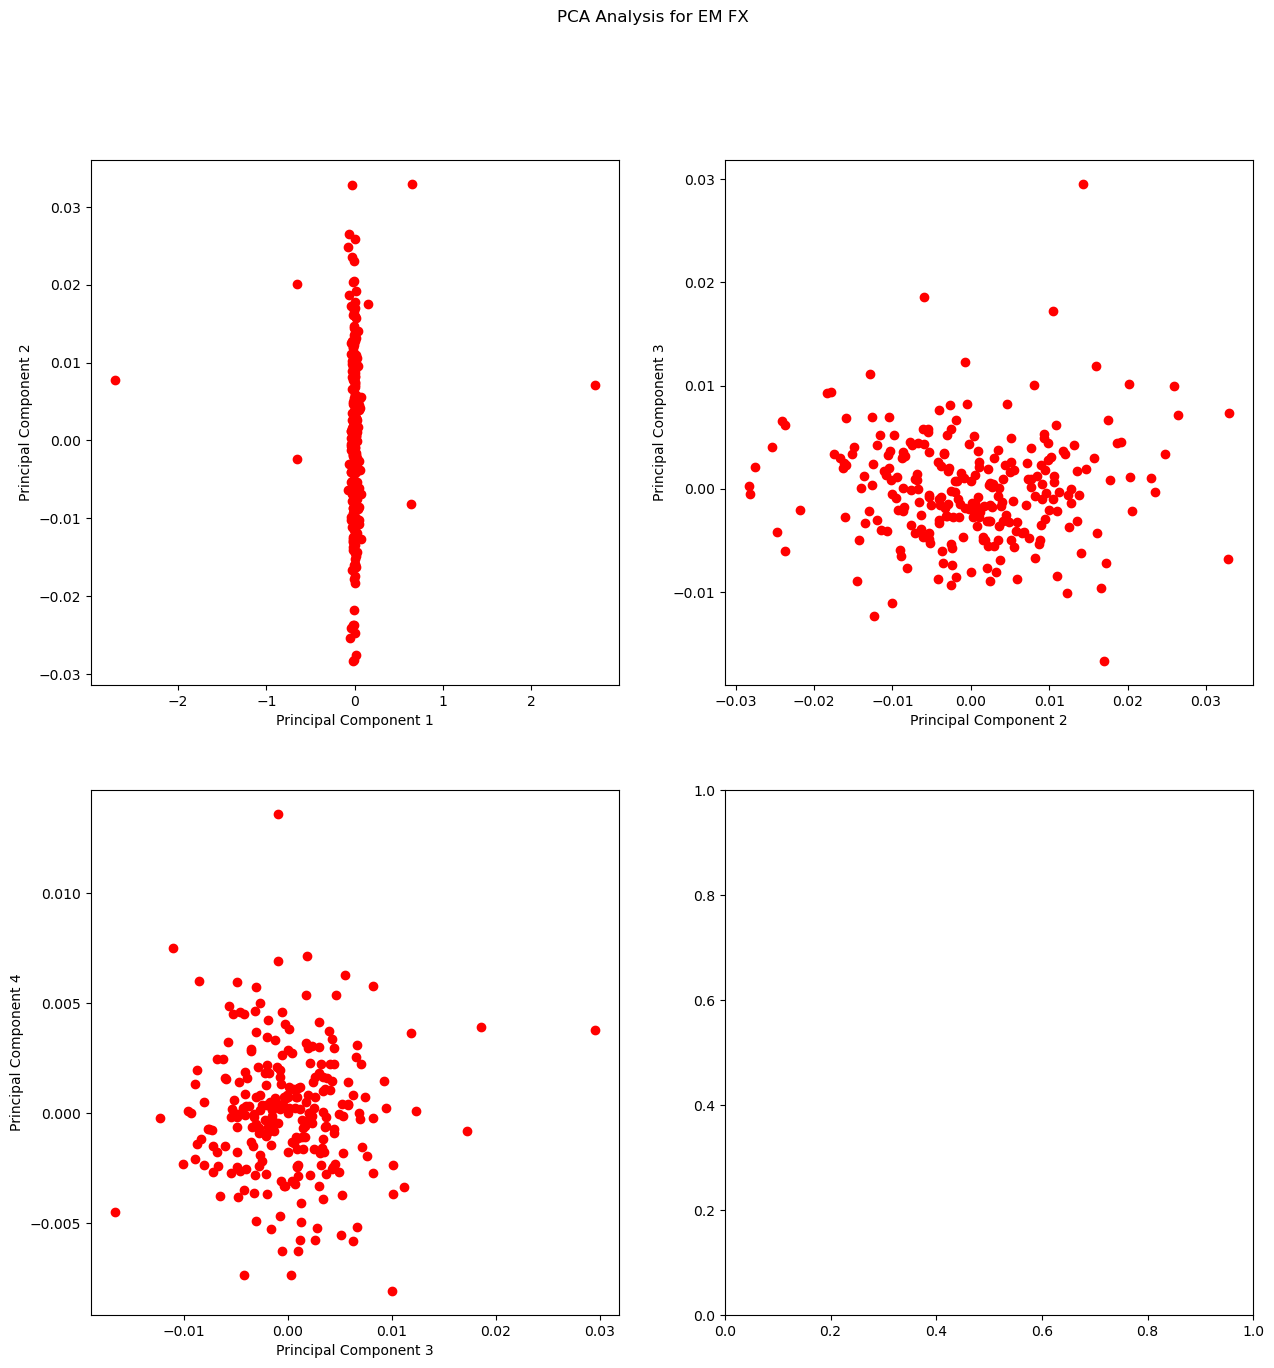

Explained variance ratio for EM FX: [9.97632036e-01 1.81699198e-03 4.23800331e-04 1.27171906e-04]
Loadings for EM FX:
              PC1       PC2       PC3       PC4
USD/MXN -0.006206  0.460081  0.886446 -0.050003
USD/RUB  0.999977  0.005328  0.004253  0.000299
USD/INR -0.000938  0.129326 -0.011198  0.991538
USD/ZAR -0.002677  0.878392 -0.462676 -0.119796


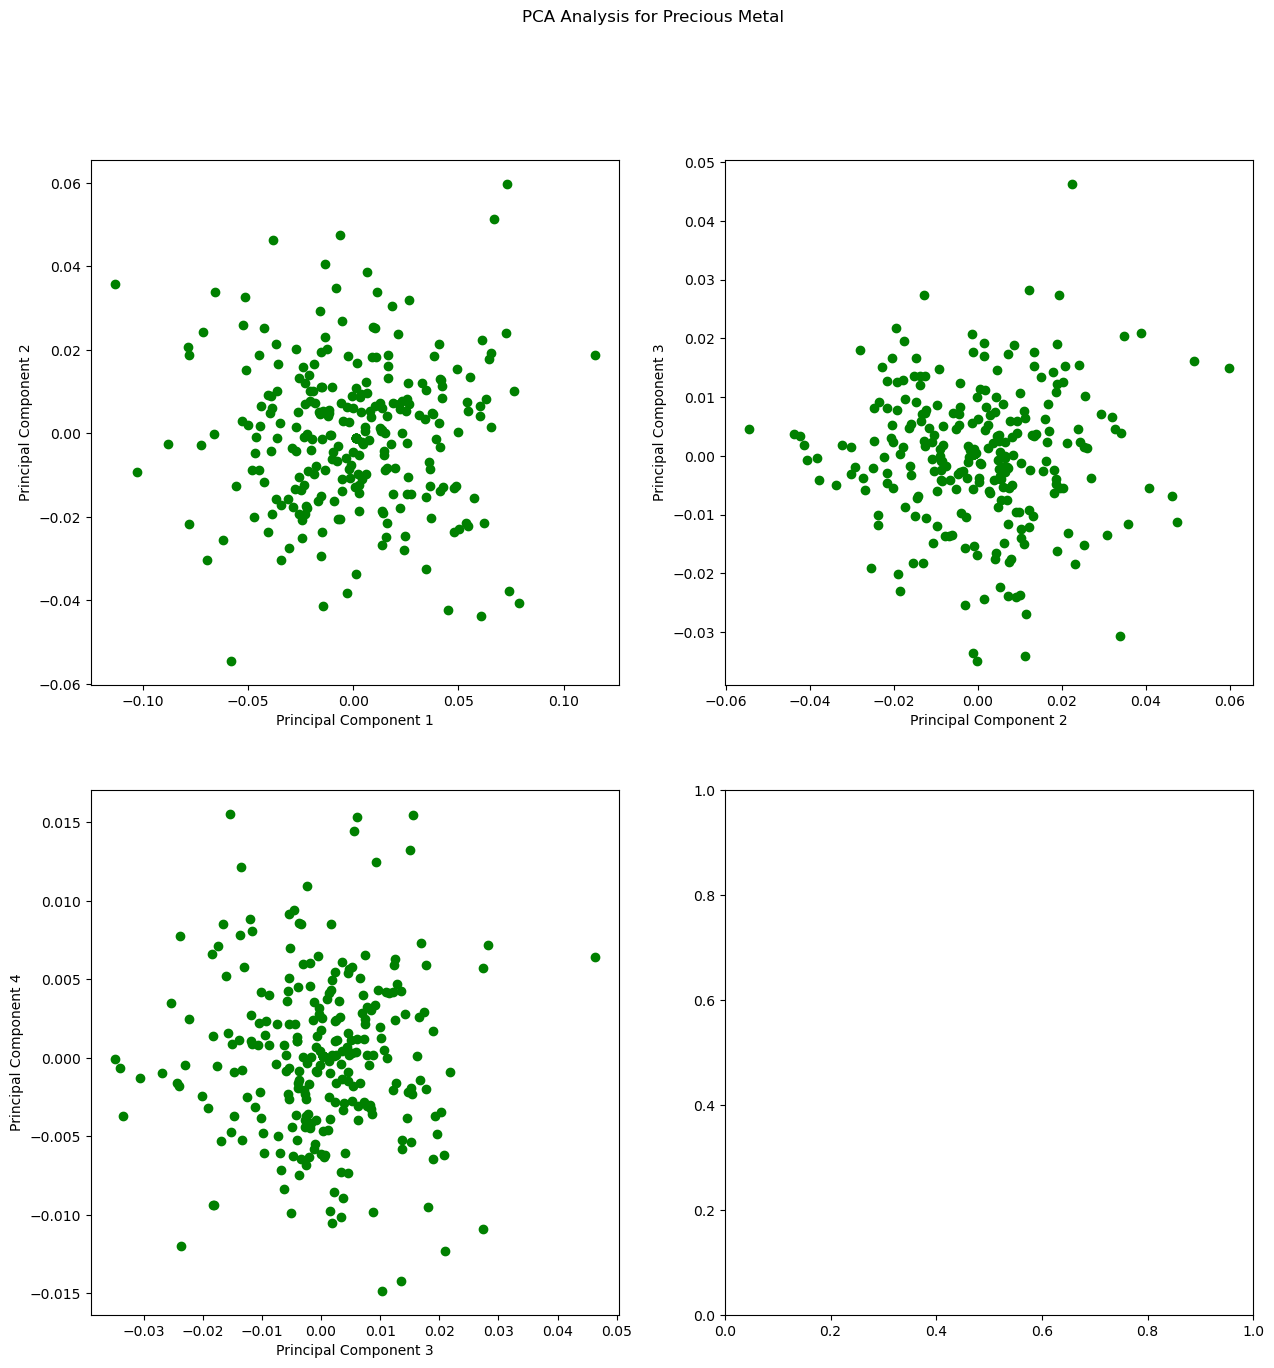

Explained variance ratio for Precious Metal: [0.72967651 0.17812259 0.07672536 0.01547554]
Loadings for Precious Metal:
                    PC1       PC2       PC3       PC4
Gold/USD       0.173123  0.256772  0.163971 -0.936595
Platinum/USD   0.439294  0.423351 -0.790140  0.058933
Palladium/USD  0.794521 -0.594496  0.123614  0.005519
Silver/USD     0.381819  0.633574  0.577504  0.345379


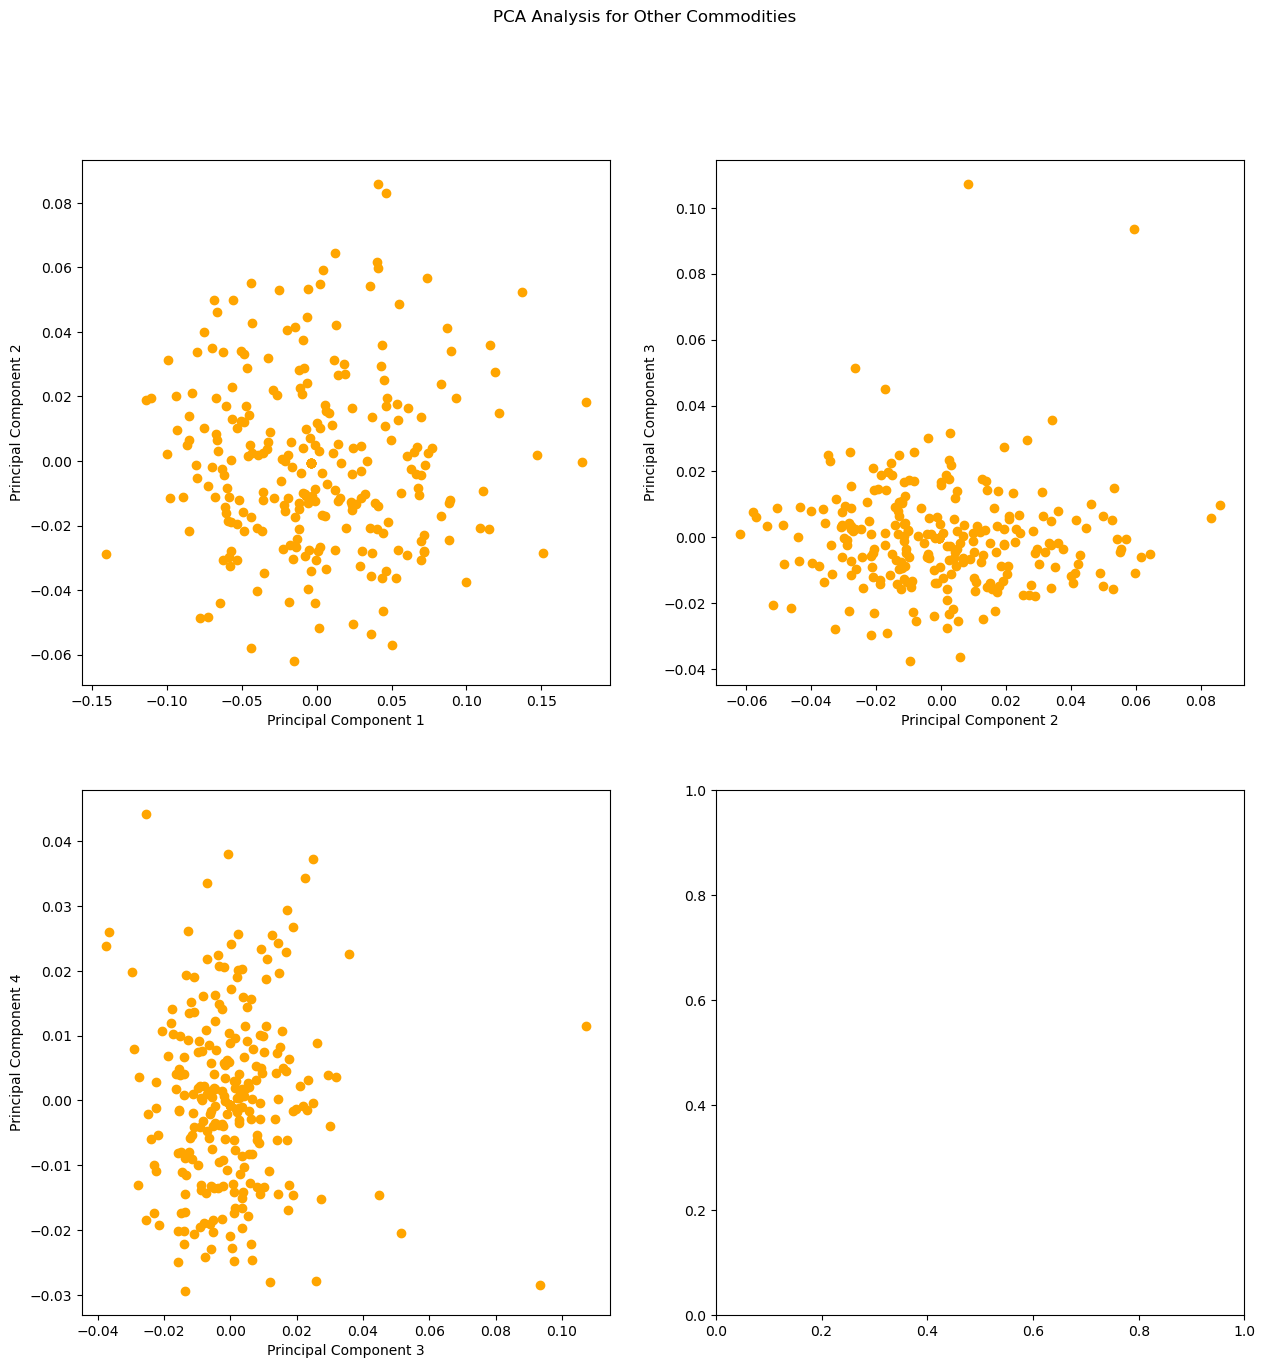

Explained variance ratio for Other Commodities: [0.72992252 0.16711632 0.05975151 0.04320965]
Loadings for Other Commodities:
                      PC1       PC2       PC3       PC4
Crude Oil/USD   -0.094255 -0.939876  0.223666 -0.240256
Natural Gas/USD -0.994894  0.096754 -0.025922 -0.012322
Soybean/USD     -0.010065 -0.298530 -0.890752  0.342548
Cocoa/USD       -0.034637 -0.134729  0.394794  0.908177


In [70]:
from sklearn.decomposition import PCA

# Define the number of principal components to use
n_components = 4

# Define colors for each category
colors = ['yellow', 'red', 'green', 'orange']

# Create a dictionary to store the loadings for each category
loadings_dict = {}

# Loop through the asset categories
for i, category in enumerate(['G10 FX', 'EM FX', 'Precious Metal', 'Other Commodities']):
    
    # Get the returns data for the current category
    category_data = asset_categories_data[category]
    
    # Perform PCA on the returns data
    pca = PCA(n_components=n_components)
    pca.fit(category_data)
    
    # Get the principal components
    principal_components = pca.transform(category_data)
    
    # Create subplots for each principal component
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    fig.suptitle(f'PCA Analysis for {category}')
    
    # Loop through each principal component and plot it
    for j in range(n_components - 1):
        row = j // 2
        col = j % 2
        axs[row, col].scatter(principal_components[:, j], principal_components[:, j+1], color=colors[i])
        axs[row, col].set_xlabel(f'Principal Component {j+1}')
        axs[row, col].set_ylabel(f'Principal Component {j+2}')
    plt.savefig(f'{category}_PCA.png')
    plt.show()

    # Print the explained variance ratio for each principal component
    print(f'Explained variance ratio for {category}: {pca.explained_variance_ratio_}')

    # Store the loadings for each principal component in a dataset
    loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components+1)], index=category_data.columns)
    loadings_dict[category] = loadings
    print(f'Loadings for {category}:')
    print(loadings)